<img src="logoucm.png" style="height: 250px">
<center style="color:#888"><br/></center>




<font size="6"><center>***Metodos numéricos en finanzas***</center></font>

<font size="5"><center><span style="color:blue">***Nombre y Apellidos: Ignacio Fernández Sánchez-Pascuala***</span></center></font>

## Importamos las librerías necesarias

In [ ]:
import numpy as np
import pandas as pd
from math import sin, cos, sqrt, log, exp, pi, comb
from math import *
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
from scipy.stats import kstest, shapiro, ks_2samp, chisquare, norm
import scipy.stats as stats

<font size="6"><center><span style="color:blue">***Práctica 0: Generadores de números pseudoaleatorios***</span></center></font>

## 1. Método congruencial


Considerad los siguientes valores para los parámetros en el método congruencial:  
* m=2**(31)-1
* a=16807
* b=0  

y la semilla inicial en todos los casos será:  
* x0=123456789

In [ ]:
def congru(x0):
    m=2**(31)-1
    a=16807
    b=0
    x=(a*x0+b)%m
    x_u=x/m
    return(x,x_u)

1. Para comprobar que está correctamente programado, generar 100 valores U(0,1). Éstos deben cumplir:  

    * $\overline{x} = 0.47682692$
    * $S^2_n = 0.09155876$
    * $S^2_{n-1} = 0.09248360$
    * $u1 = 0.2184183 ~ u2 = 0.95631758 ~ u3 = 0.82950923 . . .$  
    

2. Justificar que los números generados proceden de una distribución U(0,1).

In [ ]:
d = 100
x0 = 123456789
x_u = np.zeros(d)
for k in range(d):
    x0, x_u[k] = congru(x0)


#Media
media = np.mean(x_u)
varianzaXn = np.var(x_u, ddof=1)
print('Media', media)
print('Varianza', varianzaXn)
print('u1= %.8f u2= %.8f u3= %.8f ...' % (x_u[0],x_u[1],x_u[2]))

Media 0.4768269202191508
Varianza 0.09248359747373669
u1= 0.21841830 u2= 0.95631758 u3= 0.82950923 ...


In [ ]:
# Test de Kolmogorov-Smirnov
ks_statistic, ks_p_value = ks_2samp(x_u, np.linspace(0, 1, 100))
alpha = 0.05
print(f"Test de Kolmogorov-Smirnov: Estadístico={ks_statistic}, p-valor={ks_p_value}")
if ks_p_value > alpha:
    print("No se puede rechazar uniformidad.")
else:
    print("Se rechaza uniformidad.")

# Test de Chi-Cuadrado
nbins = 5
hist, _ = np.histogram(x_u, bins=np.linspace(0, 1, nbins+1))
chisq_statistic, chisq_p_value = chisquare(hist)
print(f"Test de Chi-Cuadrado: Estadístico={chisq_statistic}, p-valor={chisq_p_value}")
if chisq_p_value > alpha:
    print("No se puede rechazar uniformidad.")
else:
    print("Se rechaza uniformidad.")

# Test de Rachas Wald-Wolfowitz
runs_test_statistic, runs_test_p_value = sm.stats.runstest_1samp(x_u)
print(f"Test de Rachas Wald-Wolfowitz: Estadístico={runs_test_statistic}, p-valor={runs_test_p_value}")
if runs_test_p_value > alpha:
    print("No se puede rechazar aleatoriedad.")
else:
    print("Se rechaza aleatoriedad.")

Test de Kolmogorov-Smirnov: Estadístico=0.07, p-valor=0.9684099261397212
No se puede rechazar uniformidad.
Test de Chi-Cuadrado: Estadístico=1.3, p-valor=0.8613755316556765
No se puede rechazar uniformidad.
Test de Rachas Wald-Wolfowitz: Estadístico=0.8214804793776999, p-valor=0.41137263866462614
No se puede rechazar aleatoriedad.


## 2. Box-Müller


In [ ]:
def BoxMuller(x0):
    x0,u1=congru(x0)
    x0,u2=congru(x0)
    x=sqrt(-2*log(u1))*cos(2*pi*u2)
    y=sqrt(-2*log(u1))*sin(2*pi*u2)

    return(x,y,x0)

1. Para comprobar que está correctamente programado, generar 100 valores N(0,1). Éstos deben cumplir:

    * $\overline{x} = 0.02737136$
    * $S^2_n = 1.079609$
    * $S^2_{n-1} = 1.090514$
    * $u1 = 1.679040257 ~ u2 = −0.566059812 ~ u3 = 1.212934217 . . .$
    * $\overline{y} = −0.1220177$
    * $S^2_n = 1.040119$
    * $S^2_{n-1} = 1.050626$
    * $u1 = −0.47276880 ~ u2 = −0.23112413 ~ u3 = 0.53503714 . . .$  
    

2. Justificar que los números generados proceden de una distribución N(0,1).

In [ ]:
x0 = 123456789
mu = 0
sigma = 1
d = 100
x = np.zeros(d)
y = np.zeros(d)

for i in range(d):
    x[i],y[i],x0 = BoxMuller(x0)


#Media
mediaX = np.mean(x)
varianzaX = np.var(x, ddof=1)
mediaY = np.mean(y)
varianzaY = np.var(y, ddof=1)
print('Media cos',mediaX)
print('Varianza x',varianzaX)
print('Media sin',mediaY)
print('Varianza y',varianzaY)
print('u1= %.8f u2= %.8f u3= %.8f ...' % (x[0],x[1],x[2]))
print('u1= %.8f u2= %.8f u3= %.8f ...' % (y[0],y[1],y[2]))

Media cos 0.027371357960748598
Varianza x 1.0905141204763558
Media sin -0.12201765379519719
Varianza y 1.0506256886858798
u1= 1.67904026 u2= -0.56605981 u3= 1.21293422 ...
u1= -0.47276880 u2= -0.23112413 u3= 0.53503714 ...


In [ ]:
shapiro_x = shapiro(x)
shapiro_y = shapiro(y)

print(f"Prueba de Shapiro-Wilk para x: Estadístico={shapiro_x[0]}, p-valor={shapiro_x[1]}")
print(f"Prueba de Shapiro-Wilk para y: Estadístico={shapiro_y[0]}, p-valor={shapiro_y[1]}")


ks_test_x = kstest(x, 'norm')
ks_test_y = kstest(y, 'norm')

print(f"Prueba de Kolmogorov-Smirnov para x: Estadístico={ks_test_x.statistic}, p-valor={ks_test_x.pvalue}")
print(f"Prueba de Kolmogorov-Smirnov para y: Estadístico={ks_test_y.statistic}, p-valor={ks_test_y.pvalue}")

Prueba de Shapiro-Wilk para x: Estadístico=0.9869350790977478, p-valor=0.43327534198760986
Prueba de Shapiro-Wilk para y: Estadístico=0.9852045178413391, p-valor=0.3285255432128906
Prueba de Kolmogorov-Smirnov para x: Estadístico=0.06995050900865069, p-valor=0.6855038639847688
Prueba de Kolmogorov-Smirnov para y: Estadístico=0.08681301178628553, p-valor=0.4146953912103475


Como los p-valores son mayores que cualquier nivel de significacion, no se rechaza la normalidad. También se puede ver de forma gráfica:

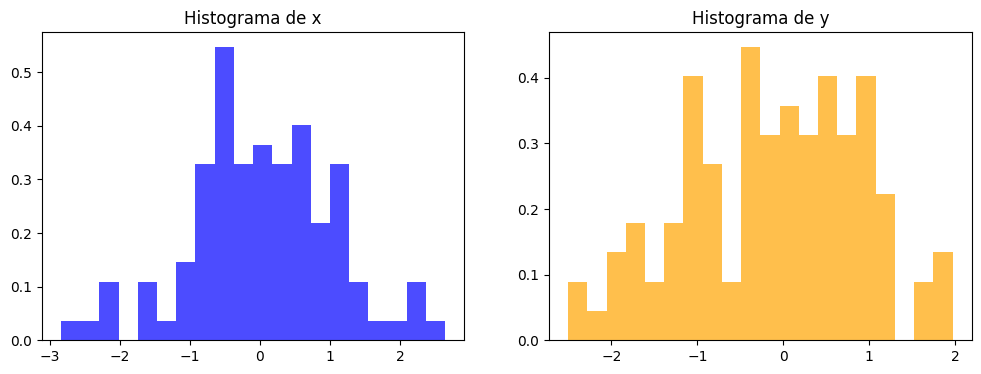

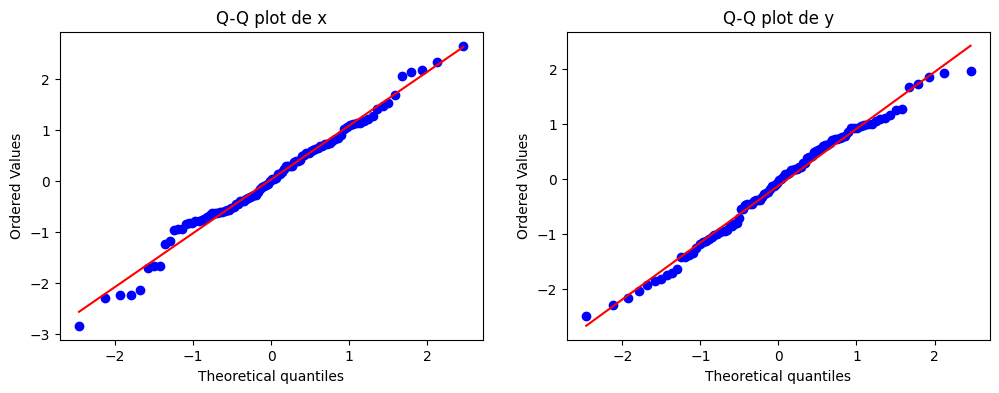

In [ ]:
# Histogramas
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(x, bins=20, density=True, color='blue', alpha=0.7, label='Histograma de x')
plt.title('Histograma de x')

plt.subplot(1, 2, 2)
plt.hist(y, bins=20, density=True, color='orange', alpha=0.7, label='Histograma de y')
plt.title('Histograma de y')

plt.show()

# Gráficos Q-Q
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
stats.probplot(x, dist='norm', plot=plt)
plt.title('Q-Q plot de x')

plt.subplot(1, 2, 2)
stats.probplot(y, dist='norm', plot=plt)
plt.title('Q-Q plot de y')

plt.show()

## 3. Método Marsaglia


In [ ]:
def Marsaglia(x0):
    while True:
        x01, u1 = congru(x0)
        x0, u2 = congru(x01)
        v1 = 2*u1-1
        v2 = 2*u2-1
        R2 = v1**2 + v2**2
        if R2<=1:
            y = sqrt((-2*log(R2))/R2)
            x1 = v1*y
            x2 = v2*y
            return(x1,x2,x0)

1. Para comprobar que está correctamente programado, generar 100 valores N(0,1). Éstos deben cumplir:

    * $\overline{x} = 0.2159052$
    * $S^2_n = 0.7075141$
    * $S^2_{n-1} = 0.7146607$
    * $u1 = 1.24295692 ~ u2 = −0.13445768 ~ u3 = −0.30786186 . . .$
    * $\overline{y} = −0.1732801$
    * $S^2_n = 0.9229105$
    * $S^2_{n-1} = 0.9322328$
    * $u1 = 0.23272421 ~ u2 = −0.68882581 ~ u3 = −0.49533179 . . .$
    
    
2. Justificar que los números generados proceden de una distribución N(0,1).


In [ ]:
x0 = 123456789
d = 100
x = np.zeros(d)
y = np.zeros(d)
for i in range(d):
    x[i],y[i],x0 = Marsaglia(x0)

#Media
mediaX = np.mean(x)
varianzaX = np.var(x, ddof=1)
mediaY = np.mean(y)
varianzaY = np.var(y, ddof=1)
print('Media cos',mediaX)
print('Varianza x',varianzaX)
print('Media sin',mediaY)
print('Varianza y',varianzaY)
print('u1= %.8f u2= %.8f u3= %.8f ...' % (x[0],x[1],x[2]))
print('u1= %.8f u2= %.8f u3= %.8f ...' % (y[0],y[1],y[2]))

Media cos 0.215905222427565
Varianza x 0.7146606838685954
Media sin -0.17328006153554742
Varianza y 0.932232837378258
u1= 1.24295692 u2= -0.13445768 u3= -0.30786186 ...
u1= 0.23272421 u2= -0.68882581 u3= -0.49533180 ...


Prueba de Shapiro-Wilk para x: Estadístico=0.9883572459220886, p-valor=0.5349122881889343
Prueba de Shapiro-Wilk para y: Estadístico=0.9866791367530823, p-valor=0.4164119064807892
Prueba de Kolmogorov-Smirnov para x: Estadístico=0.15258885196502697, p-valor=0.016910975474638844
Prueba de Kolmogorov-Smirnov para y: Estadístico=0.09645733314190497, p-valor=0.2909041255001931


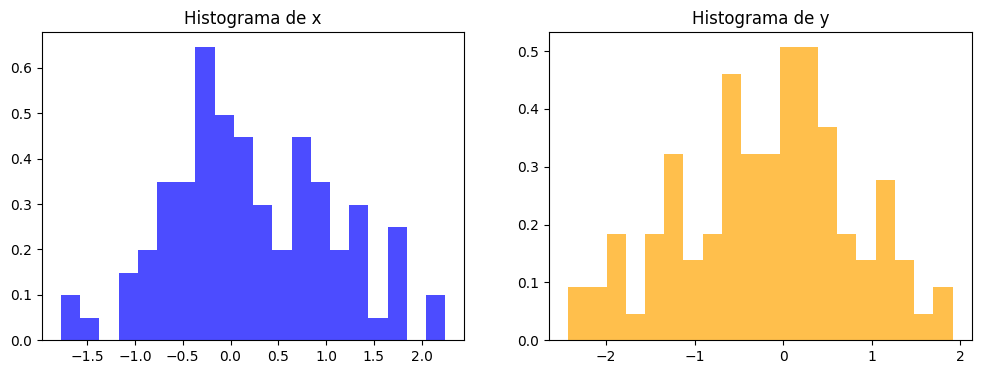

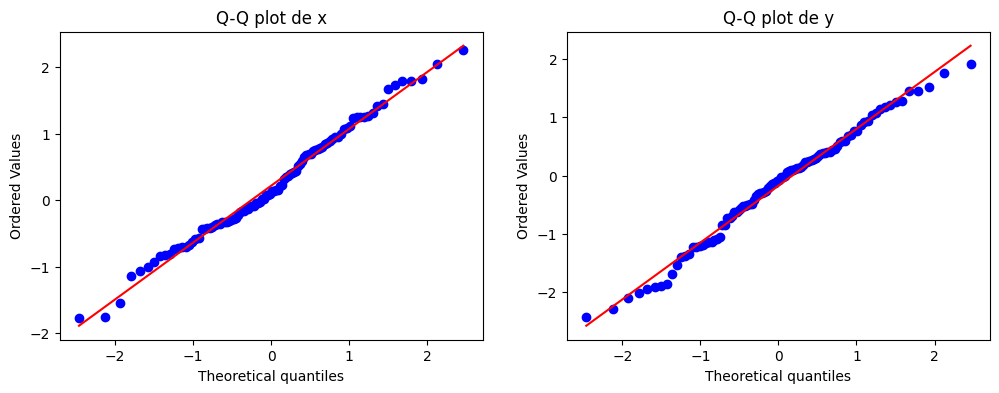

In [ ]:
shapiro_x = shapiro(x)
shapiro_y = shapiro(y)

print(f"Prueba de Shapiro-Wilk para x: Estadístico={shapiro_x[0]}, p-valor={shapiro_x[1]}")
print(f"Prueba de Shapiro-Wilk para y: Estadístico={shapiro_y[0]}, p-valor={shapiro_y[1]}")


ks_test_x = kstest(x, 'norm')
ks_test_y = kstest(y, 'norm')

print(f"Prueba de Kolmogorov-Smirnov para x: Estadístico={ks_test_x.statistic}, p-valor={ks_test_x.pvalue}")
print(f"Prueba de Kolmogorov-Smirnov para y: Estadístico={ks_test_y.statistic}, p-valor={ks_test_y.pvalue}")

# Histogramas
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(x, bins=20, density=True, color='blue', alpha=0.7, label='Histograma de x')
plt.title('Histograma de x')

plt.subplot(1, 2, 2)
plt.hist(y, bins=20, density=True, color='orange', alpha=0.7, label='Histograma de y')
plt.title('Histograma de y')

plt.show()

# Gráficos Q-Q
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
stats.probplot(x, dist='norm', plot=plt)
plt.title('Q-Q plot de x')

plt.subplot(1, 2, 2)
stats.probplot(y, dist='norm', plot=plt)
plt.title('Q-Q plot de y')

plt.show()

## 2. Box-Müller antitéticas

In [ ]:
def boxmuller_anti(mu,sigma,x0):

    x0,u_1=congru(x0)
    x0,u_2=congru(x0)

    x=sqrt(-2*log(1-u_1))*cos(2*pi*(1-u_2))
    y=sqrt(-2*log(1-u_1))*sin(2*pi*(1-u_2))

    x=sigma*x + mu
    y=sigma*y + mu

    return(x0,x,y)

## 2. Marsaglia antitéticas

In [ ]:
def marsaglia_anti(mu,sigma,x0):
    Rcuad=2;

    while Rcuad > 1:
        x0,u1=congru(x0)
        x0,u2=congru(x0)
        v1=2*(1-u1)-1
        v2=2*(1-u2)-1
        Rcuad=v1**2+v2**2

    y=sqrt(-2*log(Rcuad)/Rcuad);
    x1=v1*y;
    x2=v2*y;

    return(x0,x1,x2)

## 4. t-Student


In [ ]:
def Gamma(p,a,x0):
    u = np.zeros(p)
    suma = 0
    for i in range(p):
        x0, v = congru(x0)
        u[i] = log(v)

    x = -sum(u)/a
    return(x,x0)

def chi_cuadrado(n,x0):
    if n%2==0:
        X,x0 = Gamma(int(n/2),1/2,x0)
        return(X,x0)
    else:
        x,x0 = Gamma(int((n-1))/2,1/2,x0)
        y,Z,x0 = BoxMuller(x0)
        X = x + Z**2
        return(X,x0)

def t_Student(n,x0):
    x,Z,x0 = BoxMuller(x0)
    Y,x0 = chi_cuadrado(n,x0)
    X = Z/sqrt(Y/n)
    return(X,x0)

Para comprobar que está correctamente programado, generar 100 valores de la variable aleatoria $t_{10}$.
Éstos deben cumplir:
* $\overline{x} = −0.00024283$
* $S^2_n = 1.515859$
* $S^2_{n-1} = 1.531171$
* $u1 = −0.442199721 ~ u2 = 0.558411054 ~ u3 = 0.006160887 . . .$


In [ ]:
d = 100
n = 10
x0 = 123456789
x = np.zeros(d)
for i in range(d):
    x[i],x0 = t_Student(n,x0)


#Media
media = np.mean(x)
varianzaXn = np.var(x, ddof=1)
print('Media', media)
print('Varianza', varianzaXn)
print('u1= %.8f u2= %.8f u3= %.8f ...' % (x[0],x[1],x[2]))

Media -0.00024282921630347954
Varianza 1.5311711734970987
u1= -0.44219972 u2= 0.55841105 u3= 0.00616089 ...


<font size="6"><center><span style="color:blue">***Práctica 1***</span></center></font>

1. Generar un movimiento browniano unidimensional para T=100 con ∆𝑡=1 según la expresión:

<font size="3"><center>$X \leftarrow X + \sqrt{\Delta t } Z$ donde $Z \sim \mathcal{N}(0,1)$</center></font>

2. Generar 4 movimientos brownianos usando los valores de la distribución Normal generados mediante el seno y coseno del método de Box-Müller y también con variables antitéticas.

3. Generar 4 movimientos brownianos usando los valores de la ditribución normal generados mediante el método de Marsaglia y también con variables antitéticas.

<font size="2">*Nota: Reiniciar la semilla cada vez que se use un método nuevo.
Representar gráficamente las ocho trayectorias obtenidas. Verificar con estas imágenes:*</font>

<div class="pull-left"><img src="4movBM.png" style="height: 300px"></div>
<img src="4movMG.png" style="height: 300px">

4. Representar graficamente 1 movimiento browniano bidimensional.

### Ejercicio 1.1

He utilizado la componente del coseno del metodo Box-Muller para generar la normal del movimiento browniano.

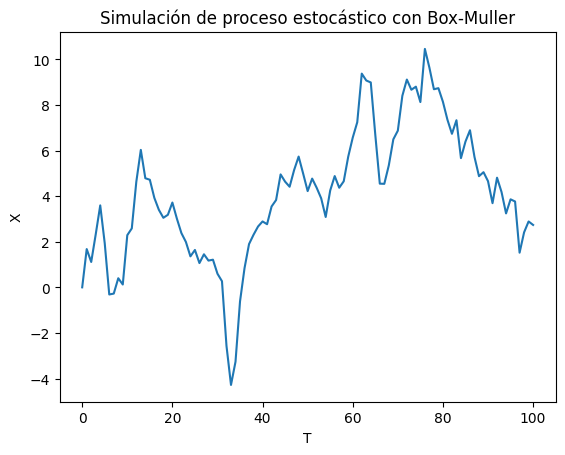

In [ ]:
T=100
delta = 1
X = np.zeros(T+1)
x0=123456789
for i in range(1,T+1):
  Z,y,x0 = BoxMuller(x0)
  X[i]=X[i-1]+delta*Z

# Gráfica en función de T
plt.plot(np.arange(T+1), X)
plt.title('Simulación de proceso estocástico con Box-Muller')
plt.xlabel('T')
plt.ylabel('X')
plt.show()

### Ejercicio 1.2

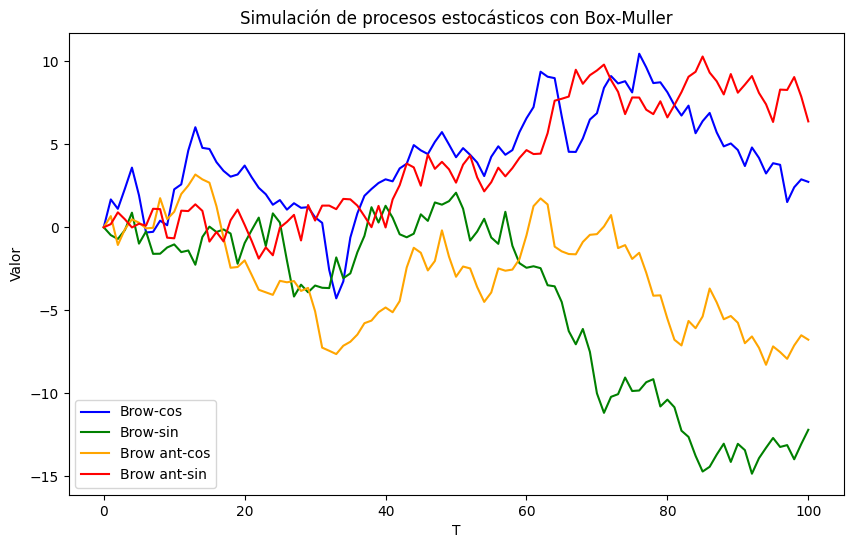

In [ ]:
T=100
delta = 1
X_BM = np.zeros(T+1)
Y_BM = np.zeros(T+1)
Z_BM = np.zeros(T+1)
V_BM = np.zeros(T+1)
x0 = 123456789
x1 = 123456789
for i in range(1,T+1):
  x,y,x0 = BoxMuller(x0)
  X_BM[i]=X_BM[i-1]+delta*x
  Y_BM[i]=Y_BM[i-1]+ delta*y
  x1,z,v = boxmuller_anti(0,1,x1)
  Z_BM[i] = Z_BM[i-1]+delta*z
  V_BM[i] = V_BM[i-1]+delta*v

# Gráficos
plt.figure(figsize=(10, 6))

plt.plot(np.arange(T+1), X_BM, label='Brow-cos', color='blue')
plt.plot(np.arange(T+1), Y_BM, label='Brow-sin', color='green')
plt.plot(np.arange(T+1), Z_BM, label='Brow ant-cos', color='orange')
plt.plot(np.arange(T+1), V_BM, label='Brow ant-sin', color='red')

plt.title('Simulación de procesos estocásticos con Box-Muller')
plt.xlabel('T')
plt.ylabel('Valor')
plt.legend()
plt.show()

### Ejercicio 1.3

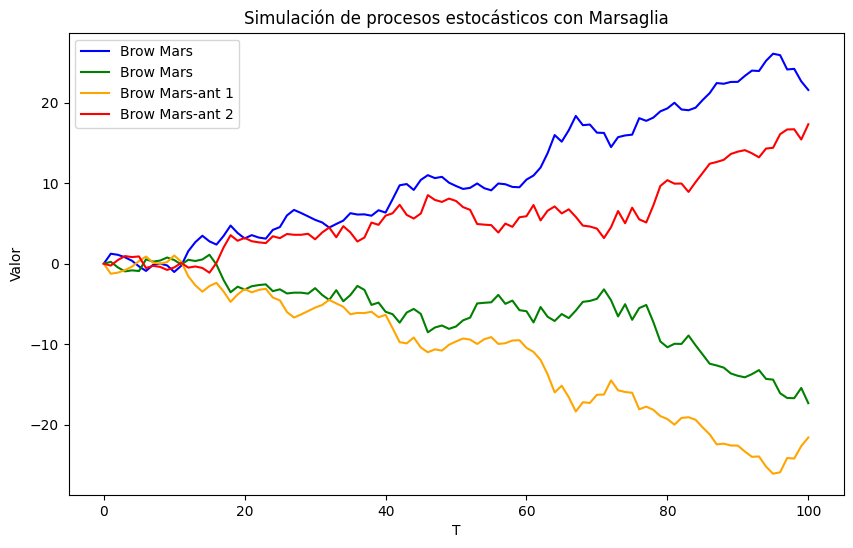

In [ ]:
T=100
delta = 1
X_MS = np.zeros(T+1)
Y_MS = np.zeros(T+1)
Z_MS = np.zeros(T+1)
V_MS = np.zeros(T+1)
x0 = 123456789
x1 = 123456789
for i in range(1,T+1):
  x,y,x0 = Marsaglia(x0)
  X_MS[i]=X_MS[i-1]+delta*x
  Y_MS[i]=Y_MS[i-1]+ delta*y
  x1,z,v = marsaglia_anti(0,1,x1)
  Z_MS[i] = Z_MS[i-1]+delta*z
  V_MS[i] = V_MS[i-1]+delta*v

# Gráficos
plt.figure(figsize=(10, 6))

plt.plot(np.arange(T+1), X_MS, label='Brow Mars', color='blue')
plt.plot(np.arange(T+1), Y_MS, label='Brow Mars', color='green')
plt.plot(np.arange(T+1), Z_MS, label='Brow Mars-ant 1', color='orange')
plt.plot(np.arange(T+1), V_MS, label='Brow Mars-ant 2', color='red')

plt.title('Simulación de procesos estocásticos con Marsaglia')
plt.xlabel('T')
plt.ylabel('Valor')
plt.legend()
plt.show()

### Ejercicio 1.4

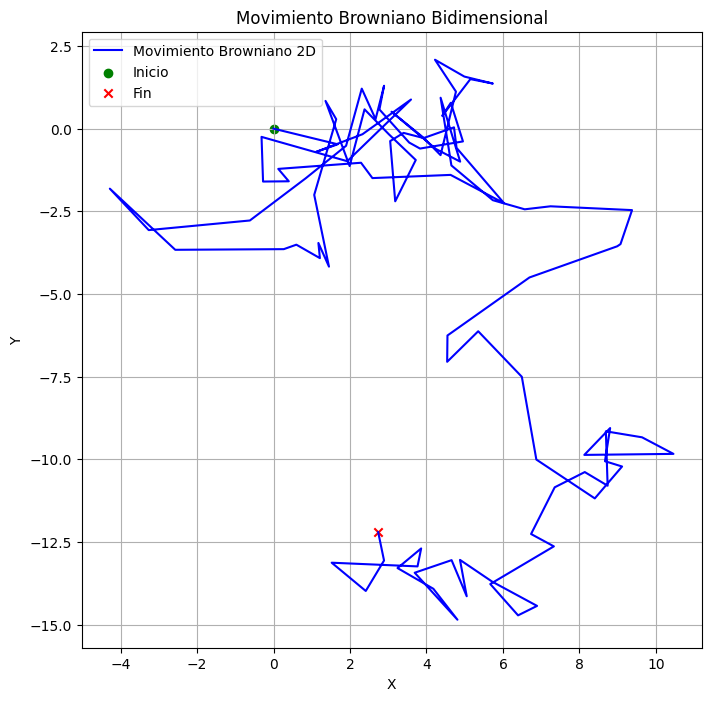

In [ ]:
# Gráfico Movimiento Browniano Bidimensional Box-Muller
plt.figure(figsize=(8, 8))
plt.plot(X_BM, Y_BM, label='Movimiento Browniano 2D', color='blue')
plt.scatter(X_BM[0], Y_BM[0], color='green', marker='o', label='Inicio')
plt.scatter(X_BM[-1], Y_BM[-1], color='red', marker='x', label='Fin')

plt.title('Movimiento Browniano Bidimensional')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

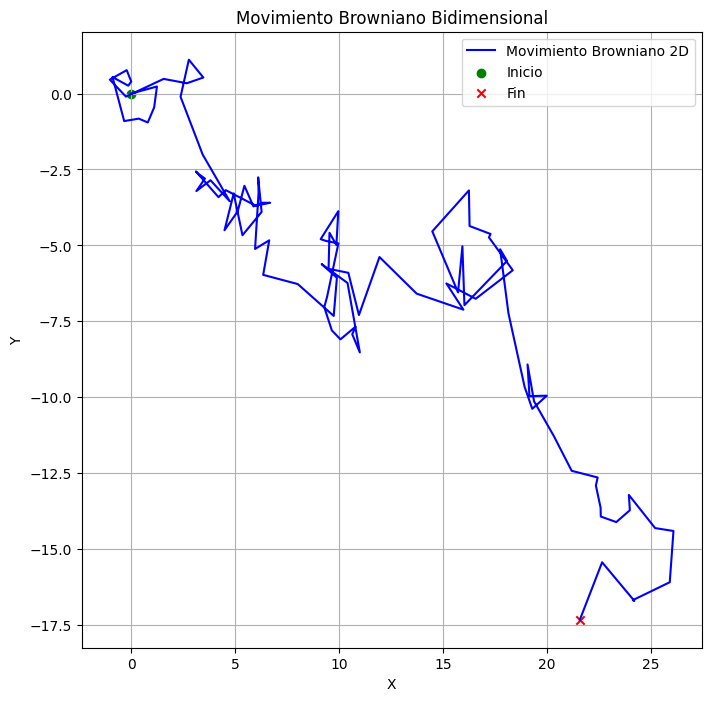

In [ ]:
# Gráfico Movimiento Browniano Bidimensional Marsaglia
plt.figure(figsize=(8, 8))
plt.plot(X_MS, Y_MS, label='Movimiento Browniano 2D', color='blue')
plt.scatter(X_MS[0], Y_MS[0], color='green', marker='o', label='Inicio')
plt.scatter(X_MS[-1], Y_MS[-1], color='red', marker='x', label='Fin')

plt.title('Movimiento Browniano Bidimensional')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

<font size="6"><center><span style="color:blue">***Práctica 2***</span></center></font>

<font size="4" color=blue>**Apartado a**</font>
***

Obtener los valores de una opción call y una opción put europeas con vencimiento $T$. Dar la estimación del valor y la precisión si:  

$$
V_{\mathrm{call}} = e^{-r_c t} \mathbb{E}_{\mathrm{riesgo~neutro}} [\textrm{payoff}] = (1+r)^{-t} \mathbb{E}_{\mathrm{riesgo~neutro}}[\textrm{payoff}].
$$

- **(a.1.)** Obtener el valor de una opción call usando la fórmula de Black-Scholes:  

$$
V_{\mathrm{call}}(S,t) = Se^{-d_c t} \Phi(d_1) - Ke^{-r_c t} \Phi(d_2),
$$

donde:
$$
d_1 = \frac{\ln(S/K) + (r_c -d_c + 0.5 \sigma^2)t}{\sigma \sqrt{t}}, \quad d_2 = d_1 -\sigma\sqrt{t}.
$$

**Datos:**
- $r = 0.03$
- Strike = $14$
- Plazo $T = 1,2,3$
- $\sigma = 0.3$
- $S_0 = 14$
- $d = 0$

<font size="2">**Nota:** La varianza de la estimación del valor es $S^2_{\mathrm{call}} = (e^{-r_c t})^2 S^2_{\mathrm{\overline{payoff}}}$.
    
<font size="2" color=grey>**Nota para comprobación:** $t=1; V_{\mathrm{call}}=1.856787;V_{\mathrm{put}}=1.449020$.</font>



### Ejercicio 2.a

In [ ]:
def black_scholes(S, K, t, r, sigma, d):
    d1 = (log(S / K) + (r - d + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * sqrt(t)

    call_value = S * exp(-d * t) * norm.cdf(d1) - K * exp(-r * t) * norm.cdf(d2)
    put_value = -S * norm.cdf(-d1) + K * exp(-r * t) * norm.cdf(-d2)

    return call_value, put_value

#Inicialización parametros
r = 0.03
r_c = log(1+r)
K = 14 #Strike
T = [1,2,3]
sigma = 0.3
S0 = 14
d = 0
d_c = log(1+d)

#Calculo resultados
for t in T:
    call_value, put_value = black_scholes(S0, K, t, r_c, sigma, d_c)
    print(f'Valor de la opción call para T={t}: {call_value:.8f}')
    print(f'Valor de la opción put para T={t}: {put_value:.8f}')


Valor de la opción call para T=1: 1.85678671
Valor de la opción put para T=1: 1.44901972
Valor de la opción call para T=2: 2.70807015
Valor de la opción put para T=2: 1.90441288
Valor de la opción call para T=3: 3.38107201
Valor de la opción put para T=3: 2.19305524


<font size="4" color=blue>**Apartado b**</font>
***
Obtener los valores de una opción call y una opción put europeas con vencimiento $T = 1$ (con los mismos datos del apartado anterior). Dar la estimación del valor y la precisión si:  

$$
V_{\mathrm{call}} = e^{-r_c t} \mathbb{E}_{\mathrm{riesgo~neutro}}[\textrm{payoff}] = (1+r)^{-t} \mathbb{E}_{\mathrm{riesgo~neutro}}[\textrm{payoff}].
$$

- **(b.1.)** Obtener el valor final del subyacente mediante la expresión en el plazo final:  

$$
S(t) = S(0) e^{(r_c - d_c - 0.5\sigma^2)t + \sigma \sqrt{t}\mathcal{N}(0,1)}.
$$

<font size="2" color=grey>**Nota para comprobación:** $t=1; V_{\mathrm{call}}=1.919841;Varianza=10.065818;Precisión=0.196879$.</font>
    
- **(b.2.)** Obtener el valor final del subyacente mediante simulación dinámica con $\Delta t = 1/12$ y la expresión (Lema de Itô):  

$$
S \leftarrow S e^{(r_c - d_c - 0.5\sigma^2)\Delta t + \sigma \sqrt{\Delta t}\mathcal{N}(0,1)}.
$$

<font size="2" color=grey>**Nota para comprobación:** $t=1; V_{\mathrm{call}}=2.008849;Varianza=10.349455;Precisión=0.199633$.</font>
    
- **(b.3.)** Obtener el valor final del subyacente mediante simulación dinámica con $\Delta t = 1/12$ y el mecanismo de transición. (Ecuación estocástica)  

$$
S \leftarrow S + S(r_{\Delta t} - d_{\Delta t})+\sigma S \sqrt{\Delta t}\mathcal{N}(0,1) = S(1+r-d)^{\Delta t} + \sigma S \sqrt{\Delta t} \mathcal{N}(0,1)
$$

<font size="2" color=grey>**Nota para comprobación:** $t=1; V_{\mathrm{call}}=2.005745;Varianza=10.020386;Precisión=0.196434$.</font>
    
- **(b.4.)** Usando el valor final del subyacente mediante la expresión en el plazo final, determinar el tamaño muestral para que la estimación sea de un céntimo de Euro.

<font size="2" color=grey>**Nota para comprobación:** $t=1;n \approx 388mil$.</font>

### Ejercicio 2.b.1

In [ ]:
from scipy.stats import t
#Funcion auxiliar calcular precision
def calcular_precision(num_simul, r_c, T, S_p, precision_alpha):
    precision_df = num_simul - 1
    t_quantile = t.ppf(1 - precision_alpha/2, precision_df)
    precision = exp(-r_c * T) * t_quantile * sqrt(S_p / num_simul)
    return precision

In [ ]:
def simulacion_opcion(num_simul, S0, r_c, d_c, sigma, K, T,x0):
    S_sim = np.zeros(num_simul)

    for i in range(num_simul):
        x, y, x0 = BoxMuller(x0)
        S = S0 * exp((r_c - d_c - 0.5 * sigma ** 2) * T + sigma * sqrt(T) * y)
        S_sim[i] = S
    return S_sim,x0

# Parámetros del modelo
num_simul = 1000
S0 = 14
r = 0.03
d = 0
sigma = 0.3
K = 14
x0 = 123456789
r_c = log(1 + r)
d_c = log(1 + d)
precision_alpha = 0.05
T=[1,2,3]

for tiempo in T:
  # Llamada a la función
  S_sim,x0 = simulacion_opcion(num_simul, S0, r_c, d_c, sigma, K, tiempo,x0)

  #Calculo resultados
  Payoff_call = np.maximum(S_sim - K, 0)
  E_p_call = np.mean(Payoff_call)
  S_p_call = np.var(Payoff_call, ddof=1)
  S_call = exp(-r_c * tiempo) ** 2 * S_p_call
  call_value = exp(-r_c * tiempo) * E_p_call
  precision_call = calcular_precision(num_simul, r_c, tiempo, S_p_call,precision_alpha)

  Payoff_put = np.maximum(S_sim - K, 0)
  E_p_put = np.mean(Payoff_put)
  S_p_put = np.var(Payoff_put, ddof=1)
  S_put = exp(-r_c * tiempo) ** 2 * S_p_put
  put_value = exp(-r_c * tiempo) * E_p_put
  precision_put = calcular_precision(num_simul, r_c, tiempo, S_p_put,precision_alpha)

  print('')
  print(f'Valor de la opción Vcall para T={tiempo}: {call_value:.8f}')
  print('Varianza:', S_call)
  print('Precisión:', precision_call)
  print('')
  print(f'Valor de la opción Vput para T={tiempo}: {put_value:.8f}')
  print('Varianza:', S_put)
  print('Precisión:', precision_put)
  print('')
  print('S1= %.8f S2= %.8f S3= %.8f ...' % (S_sim[0], S_sim[1], S_sim[2]))
  print('')
  print('#######################')



Valor de la opción Vcall para T=1: 1.91984115
Varianza: 10.065817939619663
Precisión: 0.19687887334678045

Valor de la opción Vput para T=1: 1.91984115
Varianza: 10.065817939619663
Precisión: 0.19687887334678045

S1= 11.96260449 S2= 12.86202141 S3= 16.18568603 ...

#######################

Valor de la opción Vcall para T=2: 2.90019260
Varianza: 24.59143332494058
Precisión: 0.30772763644611484

Valor de la opción Vput para T=2: 2.90019260
Varianza: 24.59143332494058
Precisión: 0.30772763644611484

S1= 10.72768391 S2= 22.76100908 S3= 17.33655037 ...

#######################

Valor de la opción Vcall para T=3: 3.24479328
Varianza: 38.94856952340449
Precisión: 0.38727577865953094

Valor de la opción Vput para T=3: 3.24479328
Varianza: 38.94856952340449
Precisión: 0.38727577865953094

S1= 11.19968989 S2= 6.72162262 S3= 9.91109568 ...

#######################


### Ejercicio 2.b.2

In [ ]:
def simulacion_dinamica(num_simul, S0, r_c, d_c, sigma, T, intervalos,x0):
    S_sim = np.zeros(num_simul)
    delta_t = 1 / intervalos

    for i in range(num_simul):
        S = S0
        for j in range(intervalos*T):
            x, y, x0 = BoxMuller(x0)
            S = S * np.exp((r_c - d_c - 0.5 * sigma ** 2) * delta_t + sigma * sqrt(delta_t) * y)
        S_sim[i] = S
    return S_sim


# Parámetros del modelo
num_simul = 1000
S0 = 14
r = 0.03
r_c = log(1+r)
d = 0
d_c = log(1+d)
sigma = 0.3
intervalos = 12
x0 = 123456789
K = 14
precision_alpha = 0.05
T=[1,2,3]

for tiempo in T:
  # Llamada a la función
  S_sim = simulacion_dinamica(num_simul, S0, r_c, d_c, sigma, tiempo, intervalos, x0)

  #Resultados
  Payoff_dinamico_call = np.maximum(S_sim - K, 0)
  E_p_dinamico_call = np.mean(Payoff_dinamico_call)
  S_p_dinamico_call = np.var(Payoff_dinamico_call, ddof=1)
  S_call_dinamico = exp(-r_c * tiempo) ** 2 * S_p_dinamico_call
  call_value_dinamico = exp(-r_c * tiempo) * E_p_dinamico_call
  precision_dinamico_call = calcular_precision(num_simul, r_c, tiempo, S_p_dinamico_call,precision_alpha)

  Payoff_dinamico_put = np.maximum(K-S_sim, 0)
  E_p_dinamico_put = np.mean(Payoff_dinamico_put)
  S_p_dinamico_put = np.var(Payoff_dinamico_put, ddof=1)
  S_put_dinamico = exp(-r_c * tiempo) ** 2 * S_p_dinamico_put
  put_value_dinamico = exp(-r_c * tiempo) * E_p_dinamico_put
  precision_dinamico_put = calcular_precision(num_simul, r_c, tiempo, S_p_dinamico_put,precision_alpha)

  print('')
  print(f'Valor de la opción Vcall para T={tiempo}: {call_value_dinamico:.8f}')
  print('Varianza:', S_call_dinamico)
  print('Precisión:', precision_dinamico_call)
  print('')
  print(f'Valor de la opción Vput para T={tiempo}: {put_value_dinamico:.8f}')
  print('Varianza:', S_put_dinamico)
  print('Precisión:', precision_dinamico_put)
  print('')
  print('S1= %.8f S2= %.8f S3= %.8f ...' % (S_sim[0], S_sim[1], S_sim[2]))
  print('')
  print('###########################')


Valor de la opción Vcall para T=1: 2.00884856
Varianza: 10.349455001378766
Precisión: 0.19963345369047392

Valor de la opción Vput para T=1: 1.38802073
Varianza: 3.5211924214513015
Precisión: 0.11644462835593307

S1= 12.21319538 S2= 16.73237875 S3= 11.25791180 ...

###########################

Valor de la opción Vcall para T=2: 2.82093900
Varianza: 26.99557747817941
Precisión: 0.32241919622742643

Valor de la opción Vput para T=2: 1.85225133
Varianza: 5.730004128823459
Precisión: 0.1485429509501713

S1= 14.59684363 S2= 14.20551666 S3= 4.97985015 ...

###########################

Valor de la opción Vcall para T=3: 3.51267249
Varianza: 47.95923338954023
Precisión: 0.42974486509125087

Valor de la opción Vput para T=3: 2.16304831
Varianza: 7.577449555035823
Precisión: 0.17081897313748612

S1= 11.73785558 S2= 6.28370035 S3= 13.89530855 ...

###########################


### Ejercicio 2.b.3

In [ ]:
def simulacion_transicion(num_simul, S0, r, d, sigma, T, intervalos,x0):
    S_sim = np.zeros(num_simul)
    delta_t = 1 / intervalos

    for i in range(num_simul):
        S = S0
        for j in range(intervalos*T):
            x, y, x0 = BoxMuller(x0)
            S = S * (1 + r - d) ** delta_t + sigma * S * sqrt(delta_t) * y
        S_sim[i] = S
    return S_sim, x0

# Parámetros del modelo
num_simul = 1000
S0 = 14
r = 0.03
d = 0
sigma = 0.3
intervalos = 12
x0 = 123456789
K= 14
precision_alpha = 0.05
T=[1,2,3]
r_c = log(1+r)

for tiempo in T:
  # Llamada a la función
  S_sim,x0= simulacion_transicion(num_simul, S0, r, d, sigma, tiempo, intervalos, x0)

  #Resultados
  Payoff_transicion_call = np.maximum(S_sim - K, 0)
  E_p_transicion_call = np.mean(Payoff_transicion_call)
  S_p_transicion_call = np.var(Payoff_transicion_call, ddof=1)
  S_call_transicion = exp(-r_c * tiempo) ** 2 * S_p_transicion_call
  call_value_transicion = exp(-r_c * tiempo) * E_p_transicion_call
  precision_transicion_call = calcular_precision(num_simul, r_c, tiempo, S_p_transicion_call,precision_alpha)

  Payoff_transicion_put = np.maximum(K-S_sim, 0)
  E_p_transicion_put = np.mean(Payoff_transicion_put)
  S_p_transicion_put = np.var(Payoff_transicion_put, ddof=1)
  S_put_transicion = exp(-r_c * tiempo) ** 2 * S_p_transicion_put
  put_value_transicion = exp(-r_c * tiempo) * E_p_transicion_put
  precision_transicion_put = calcular_precision(num_simul, r_c, tiempo, S_p_transicion_put,precision_alpha)

  print('')
  print(f'Valor de la opción Vcall para T={tiempo}: {call_value_transicion:.8f}')
  print('Varianza:', S_call_transicion)
  print('Precisión:', precision_transicion_call)
  print('')
  print(f'Valor de la opción Vput para T={tiempo}: {put_value_transicion:.8f}')
  print('Varianza:', S_put_transicion)
  print('Precisión:', precision_transicion_put)
  print('')
  print('S1= %.8f S2= %.8f S3= %.8f ...' % (S_sim[0], S_sim[1], S_sim[2]))
  print('')
  print('##############################')



Valor de la opción Vcall para T=1: 2.00574534
Varianza: 10.020386095271691
Precisión: 0.19643406667514124

Valor de la opción Vput para T=1: 1.39295785
Varianza: 3.6160896382270713
Precisión: 0.11800330570756448

S1= 12.38446348 S2= 16.42207379 S3= 10.97434845 ...

##############################

Valor de la opción Vcall para T=2: 2.66842537
Varianza: 23.77645872197603
Precisión: 0.3025855367709969

Valor de la opción Vput para T=2: 1.94999779
Varianza: 6.102075926602063
Precisión: 0.1532898444335887

S1= 11.48099528 S2= 13.89669837 S3= 19.00948564 ...

##############################

Valor de la opción Vcall para T=3: 3.34327132
Varianza: 33.27285152344769
Precisión: 0.3579477121261848

Valor de la opción Vput para T=3: 2.19709105
Varianza: 7.585391477504756
Precisión: 0.17090846734962517

S1= 14.21307941 S2= 9.24003839 S3= 8.08940994 ...

##############################


### Ejercicio 2.b.4

Notas: \
-Se ha utilizado el Algoritmo en línea de Wetford para el cálculo de la varianza y la media de forma recursiva.\
-Hemos calculado la precisión cada 1000 iteracciones para que el coste computacional sea menor.

In [ ]:
def minimo_muestras_call(precision_deseada, S0, r_c, d_c, sigma, K, T,x0,precision_alpha):
    S_sim = []
    precision = float('Inf')
    S_p = 0   #Varianza inicial Payoff
    E_p = 0   #Media inicial Payoff
    num_muestras=0
    while precision>precision_deseada:
        x, y, x0 = BoxMuller(x0)
        S = S0 * exp((r_c - d_c - 0.5 * sigma ** 2) * T + sigma * sqrt(T) * y)
        S_sim.append(S)
        Payoff = max(S - K, 0)
        num_muestras=num_muestras+1
        E_p_aux = E_p + (Payoff-E_p)/num_muestras
        if num_muestras<=1:
          S_p = 0
        else:
          S_p = S_p+(Payoff-E_p)**2/num_muestras-S_p/(num_muestras-1)
        E_p = E_p_aux
        num_muestras=num_muestras+1
        if num_muestras%1000==0:
          precision = calcular_precision(num_muestras, r_c, T, S_p, precision_alpha)

    return num_muestras

def minimo_muestras_put(precision_deseada, S0, r_c, d_c, sigma, K, T,x0,precision_alpha):
    S_sim = []
    precision = float('Inf')
    S_p = 0   #Varianza inicial Payoff
    E_p = 0   #Media inicial Payoff
    num_muestras=0
    while precision>precision_deseada:
        x, y, x0 = BoxMuller(x0)
        S = S0 * exp((r_c - d_c - 0.5 * sigma ** 2) * T + sigma * sqrt(T) * y)
        S_sim.append(S)
        Payoff = max(K-S, 0)
        num_muestras=num_muestras+1
        E_p_aux = E_p + (Payoff-E_p)/num_muestras
        if num_muestras<=1:
          S_p = 0
        else:
          S_p = S_p+(Payoff-E_p)**2/num_muestras-S_p/(num_muestras-1)
        E_p = E_p_aux
        num_muestras=num_muestras+1
        if num_muestras%1000==0:
          precision = calcular_precision(num_muestras, r_c, T, S_p, precision_alpha)

    return num_muestras

#Parámetros del modelo
precision_deseada = 0.01
S0 = 14
r = 0.03
r_c = log(1+r)
d = 0
d_c = log(1+d)
sigma = 0.3
T = 1
x0 = 123456789
K = 14
precision_alpha = 0.05


# Llamada a la función
muestras_call = minimo_muestras_call(precision_deseada, S0, r_c, d_c, sigma, K, T, x0, precision_alpha)
muestras_put = minimo_muestras_put(precision_deseada, S0, r_c, d_c, sigma, K, T, x0, precision_alpha)

# Imprimir el resultado
print("Número mínimo de muestras requeridas para Vcall con T=1:", muestras_call)
print("Número mínimo de muestras requeridas para Vput con T=1:", muestras_put)

Número mínimo de muestras requeridas para Vcall con T=1: 363000
Número mínimo de muestras requeridas para Vput con T=1: 142000


Se han realizado cambios en la Practica 2, mejorando la anterior entrega y añadiendo cosas que faltaban.

<font size="6"><center><span style="color:blue">***Práctica 3***</span></center></font>

Obtener mediante simulación el valor de una opción call europea vainilla con dividendos para plazos t=1,2,...,T, pero cuyos incrementos se rigen según una distribución t-Student. Dar la estimación del valor y la precisión y comparar con el resultado de la práctica anterior. Utilizar los mismos datos que en la práctica anterior y n=6. Utilizar para la evolución del subyacente:

$$
S \leftarrow S e^{(r_c - d_c)\Delta t} + \sigma S \sqrt{\Delta t}\frac{t_n}{\sqrt{n/(n-2)}}
$$

<font size="2">**Nota:** Recordar que la varianza de una t-Student con n grados de libertad es $\frac{n}{n-2}$, con lo que al sustituir la Normal por la t-Student, ha de hacerse con ésta tipificada.
    
<font size="2" color=grey>**Nota para comprobación:** $t=1; V_{\mathrm{call}}=1.840173;Varianza=8.169188;Precisión=0.177363$.</font>

### Ejercicio 3

In [ ]:
def simulacion_dinamica3(num_simul, S0, r_c, d_c, sigma, n, T, intervalos,x0):
    S_sim = np.zeros(num_simul)
    delta_t = 1 / intervalos

    for i in range(num_simul):
        S = S0
        for j in range(intervalos*T):
            x, x0 = t_Student(n,x0)
            S = S * np.exp((r_c-d_c)*delta_t)+sigma*S*np.sqrt(delta_t)*x/(np.sqrt(n/(n-2)))
        S_sim[i] = S
    return S_sim

# Parámetros del modelo
num_simul = 1000
S0 = 14
r = 0.03
r_c = log(1+r)
d = 0
d_c = log(1+d)
sigma = 0.3
intervalos = 12
x0 = 123456789
K = 14
precision_alpha = 0.05
n=6
T=[1,2,3]

for tiempo in T:
  # Llamada a la función
  S_sim = simulacion_dinamica3(num_simul, S0, r_c, d_c, sigma, n, tiempo, intervalos, x0)

  #Resultados
  Payoff_call_dinamico = np.maximum(S_sim - K, 0)
  E_p_call_dinamico = np.mean(Payoff_call_dinamico)
  S_p_call_dinamico = np.var(Payoff_call_dinamico, ddof=1)
  S_call_dinamico = exp(-r_c * tiempo) ** 2 * S_p_call_dinamico
  call_value_dinamico = exp(-r_c * tiempo) * E_p_call_dinamico
  precision_call_dinamico = calcular_precision(num_simul, r_c, tiempo, S_p_call_dinamico,precision_alpha)

  Payoff_put_dinamico = np.maximum(K-S_sim, 0)
  E_p_put_dinamico = np.mean(Payoff_put_dinamico)
  S_p_put_dinamico = np.var(Payoff_put_dinamico, ddof=1)
  S_put_dinamico = exp(-r_c * tiempo) ** 2 * S_p_put_dinamico
  put_value_dinamico = exp(-r_c * tiempo) * E_p_put_dinamico
  precision_put_dinamico = calcular_precision(num_simul, r_c, tiempo, S_p_put_dinamico,precision_alpha)

  print('')
  print(f'Valor de la opción Vcall para T={tiempo}: {call_value_dinamico:.8f}')
  print(f'Varianza para T={tiempo}:', S_call_dinamico)
  print(f'Precisión para T={tiempo}:', precision_call_dinamico)
  print(' ')
  print(f'Valor de la opción Vput para T={tiempo}: {put_value_dinamico:.8f}')
  print(f'Varianza para T={tiempo}:', S_put_dinamico)
  print(f'Precisión para T={tiempo}:', precision_put_dinamico)
  print(' ')
  print(f'S1= %.8f S2= %.8f S3= %.8f ... para T={tiempo}' % (S_sim[0], S_sim[1], S_sim[2]))
  print('')
  print('###################')




Valor de la opción Vcall para T=1: 1.84017265
Varianza para T=1: 8.169187918920503
Precisión para T=1: 0.17736340719986526
 
Valor de la opción Vput para T=1: 1.39848403
Varianza para T=1: 3.7034954196390224
Precisión para T=1: 0.1194209401376614
 
S1= 13.02937400 S2= 12.54878563 S3= 12.68871165 ... para T=1

###################

Valor de la opción Vcall para T=2: 2.66403898
Varianza para T=2: 20.821542515398008
Precisión para T=2: 0.2831594303278022
 
Valor de la opción Vput para T=2: 1.80197825
Varianza para T=2: 5.905322475281971
Precisión para T=2: 0.15079828036884801
 
S1= 11.67877295 S2= 14.94298664 S3= 8.81205254 ... para T=2

###################

Valor de la opción Vcall para T=3: 3.46394513
Varianza para T=3: 38.33675476041107
Precisión para T=3: 0.38422202205219574
 
Valor de la opción Vput para T=3: 2.11852964
Varianza para T=3: 7.521077085087207
Precisión para T=3: 0.17018238268944927
 
S1= 10.58489874 S2= 10.37760074 S3= 9.36453936 ... para T=3

###################


### Comparacion de Métodos de transición

Veamos la comparación en la Vcall del método de transición en este apartado, con los de los demás apartados, incluyendo el método de Black-Scholes.
\
Se ha considerado el valor de T = 1.

In [ ]:
pip install prettytable

In [ ]:
from prettytable import PrettyTable

resultados = {
    '2.a B-S': {'Vcall': 1.856, 'Varianza': 0, 'Precisión': 0},
    '2.b.1': {'Vcall': 1.919, 'Varianza': 10.065, 'Precisión': 0.196},
    '2.b.2': {'Vcall': 2.008, 'Varianza': 10.349, 'Precisión': 0.199},
    '2.b.3': {'Vcall': 2.005, 'Varianza': 10.020, 'Precisión': 0.196},
    '3': {'Vcall': 1.840, 'Varianza': 8.169, 'Precisión': 0.177}
}

tabla = PrettyTable()
tabla.field_names = ['Método', 'Vcall', 'Varianza', 'Precisión']

for metodo, resultados_metodo in resultados.items():
    tabla.add_row([metodo, resultados_metodo['Vcall'], resultados_metodo['Varianza'], resultados_metodo['Precisión']])

# Imprimir la tabla
print(tabla)


+---------+-------+----------+-----------+
|  Método | Vcall | Varianza | Precisión |
+---------+-------+----------+-----------+
| 2.a B-S | 1.856 |    0     |     0     |
|  2.b.1  | 1.919 |  10.065  |   0.196   |
|  2.b.2  | 2.008 |  10.349  |   0.199   |
|  2.b.3  | 2.005 |  10.02   |   0.196   |
|    3    |  1.84 |  8.169   |   0.177   |
+---------+-------+----------+-----------+


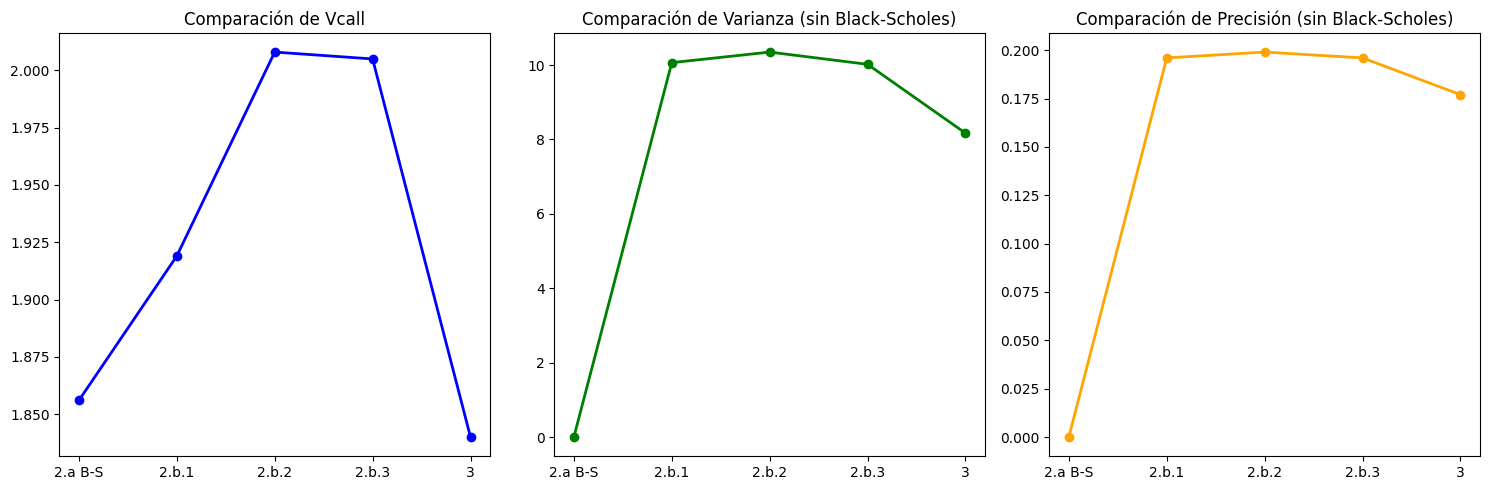

In [ ]:
# Extraer datos para cada método
metodos = list(resultados.keys())
vcall = [resultados[metodo]['Vcall'] for metodo in metodos]
varianza = [resultados[metodo]['Varianza'] for metodo in metodos]
precision = [resultados[metodo]['Precisión'] for metodo in metodos]

# Filtrar datos para Varianza y Precisión sin incluir '2.a Black-Scholes'
metodos_sin_black_scholes = [metodo for metodo in metodos if metodo != '2.a Black-Scholes']
varianza_sin_black_scholes = [resultados[metodo]['Varianza'] for metodo in metodos_sin_black_scholes]
precision_sin_black_scholes = [resultados[metodo]['Precisión'] for metodo in metodos_sin_black_scholes]

# Gráficos de líneas para Vcall
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(metodos, vcall, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Comparación de Vcall')

# Gráficos de líneas para Varianza sin '2.a Black-Scholes'
plt.subplot(1, 3, 2)
plt.plot(metodos_sin_black_scholes, varianza_sin_black_scholes, marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Comparación de Varianza (sin Black-Scholes)')

# Gráficos de líneas para Precisión sin '2.a Black-Scholes'
plt.subplot(1, 3, 3)
plt.plot(metodos_sin_black_scholes, precision_sin_black_scholes, marker='o', color='orange', linestyle='-', linewidth=2)
plt.title('Comparación de Precisión (sin Black-Scholes)')

plt.tight_layout()
plt.show()

Nota- El método de Black-Scholes usa fórmulas exactas, por tanto no tiene varianza ni precisión.

<font size="6"><center><span style="color:blue">***Práctica 4***</span></center></font>


<font size="4" color=blue>**Apartado a**</font>
***
Se trata de ver la influencia que tienen los parámetros en el valor de la opción, de acuerdo a la fórmula de Black-Scholes, de una forma intuitiva basada en revisar el cambio del valor de la opción cuando cambian los parámetros a través de una rejilla de valores. En la mayoría de los casos, se puede ver una cuantificación más exacta de forma analítica utilizando la derivada parcial del valor de la opción con respecto a la variable que estamos examinando.

Teniendo en cuenta la fórmula de Black-Scholes para valoración de opciones:  

$$
V_{\mathrm{call}}(S,t) = Se^{-d_c t} \Phi(d_1) - Ke^{-r_c t} \Phi(d_2),
$$

donde:
$$
d_1 = \frac{\ln(S/K) + (r_c -d_c + 0.5 \sigma^2)t}{\sigma \sqrt{t}}, \quad d_2 = d_1 -\sigma\sqrt{t}.
$$
***
**Recordatorio datos utilizados anteriormente:**
- $r = 0.03$
- Strike = $14$
- Plazo $T = 1,2,3$
- $\sigma = 0.3$
- $S_0 = 14$
- $d = 0$
    
<font size="2" color=grey>**Nota para comprobación:** $t=1; V_{\mathrm{call}}=1.856787;V_{\mathrm{put}}=1.449020$.</font>
***
Se trata de realizar una tabla en la que por filas se realicen modificaciones del valor del strike $K$, por ejemplo para valores 12, 13, 14, 15, 16 y por columnas de la tasa de interés $r$, por ejemplo valores 0.01, 0.02, 0.03, 0.04, 0.05 y el contenido de la celda se corresponda con el valor de la opción. Mostrar 2 tablas, la primera para T=0.5 y la segunda para T=1. Ejemplo de estilo de tabla:

<center><strong>Valores de distintas opciones de compra Call</strong></center>
   
|   |   |   | **r** |    |   |
|--------------|--------------|--------------|--------------|--------------|--------------|
| **k**    | **0.01**    | **0.02**    | **0.03**    | **0.04**    | **0.05**    |
| **12**    | ......    | ......    | ......    | ......    | ......    |
| **13**    | ......    | ......    | ......    | ......    | ......    |
| **14**    | ......    | ......    |1.856787| ......    | ......    |
| **15**    | ......    | ......    | ......    | ......    | ......    |
| **16**    | ......    | ......    | ......    | ......    | ......    |




Se pide analizar y comentar los siguientes casos:

- **(a.1.) Modificaciones en el tiempo T hasta la fecha de ejercicio.**
- **(a.2.) Modificaciones en la tasa de interés r.**
- **(a.3.) Modificaciones en el precio de ejercicio K.**

Añadir las tablas que consideréis para poder analizar:

- **(a.4.) Cambios en la volatilidad $\sigma$.**



# Contexto Ecuación Black-Scholes

Fisher Black y Myron Scholes encontraron una ecuación para la valoración de determinados
bienes y/o activos lo cual los hizo merecedores del premio nobel en economía, sin embargo
años más tarde se comienza a detectar que, de manera creciente el precio del mercado de las
opciones diverge del precio de las opciones calculado mediante la ecuación Black-Scholes por
el hecho de que el mercado aplica volatilidades diferentes para estimar la prima de la opción
sobre el mismo subyacente, rompiendo el supuesto de volatilidad constante el cual es uno de
los requisitos del modelo de Black-Scholes.

### Ejercicio 4.a

Utilizamos la funcion de Black-Sholes definida en la práctica 2.

In [ ]:
# Inicialización de parámetros
r = 0.03
r_c = log(1 + r)
K_values = [12, 13, 14, 15, 16]
r_values = [0.01, 0.02, 0.03, 0.04, 0.05]
T_values = [0.5, 1]
sigma = 0.3
S0 = 14
d = 0
d_c = log(1 + d)

# Crear DataFrames para almacenar los resultados
columns = [f'{r_val:.2f}' for r_val in r_values]
index = [f'{K_val}' for K_val in K_values]

# Utiliza solo 'K_values' como índices
results_T_05 = pd.DataFrame(index=index, columns=columns)
results_T_1 = pd.DataFrame(index=index, columns=columns)
results_T_05.index.name = 'Precio de ejercicio (K)'
results_T_05.columns.name = 'Tasa de interés (r)'
results_T_1.index.name = 'Precio de ejercicio (K)'
results_T_1.columns.name = 'Tasa de interés (r)'
results_T_05_put = pd.DataFrame(index=index, columns=columns)
results_T_1_put = pd.DataFrame(index=index, columns=columns)
results_T_05_put.index.name = 'Precio de ejercicio (K)'
results_T_05_put.columns.name = 'Tasa de interés (r)'
results_T_1_put.index.name = 'Precio de ejercicio (K)'
results_T_1_put.columns.name = 'Tasa de interés (r)'

# Calcular resultados y llenar las tablas
for K_val in K_values:
    for r_val in r_values:
        for T_val in T_values:
            r_c_val = log(1 + r_val)
            call_value, put_value = black_scholes(S0, K_val, T_val, r_c_val, sigma, d_c)

            if T_val == 0.5:
                results_T_05.at[str(K_val), f'{r_val:.2f}'] = call_value
                results_T_05_put.at[str(K_val), f'{r_val:.2f}'] = put_value
            elif T_val == 1:
                results_T_1.at[str(K_val), f'{r_val:.2f}'] = call_value
                results_T_1_put.at[str(K_val), f'{r_val:.2f}'] = put_value


# Mostrar las tablas sin la última columna
print("Valores de distintas opciones de compra Call para T=0.5 variando la tasa de interés y el precio de ejercicio.\n")
print(results_T_05.to_string())
print('')
print('############################################')
print('')
print("Valores de distintas opciones de compra Call para T=1 variando la tasa de interés y el precio de ejercicio.\n.")
print(results_T_1.to_string())
print('')
print('############################################')
print('')
print("Valores de distintas opciones de compra Put para T=0.5 variando la tasa de interés y el precio de ejercicio.\n.")
print(results_T_05_put.to_string())
print('')
print('############################################')
print('')
print("Valores de distintas opciones de compra Put para T=1 variando la tasa de interés y el precio de ejercicio.\n.")
print(results_T_1_put.to_string())

Valores de distintas opciones de compra Call para T=0.5 variando la tasa de interés y el precio de ejercicio.

Tasa de interés (r)          0.01      0.02      0.03      0.04      0.05
Precio de ejercicio (K)                                                  
12                       2.418062  2.461715  2.505158  2.548382  2.591382
13                       1.747686  1.786437  1.825176  1.863891  1.902572
14                       1.214709  1.246999  1.279438  1.312015  1.344717
15                       0.813874  0.839249  0.864872  0.890734  0.916824
16                       0.527375  0.546293  0.565496  0.584977   0.60473

############################################

Valores de distintas opciones de compra Call para T=1 variando la tasa de interés y el precio de ejercicio.
.
Tasa de interés (r)          0.01      0.02      0.03      0.04      0.05
Precio de ejercicio (K)                                                  
12                       2.825326  2.902243  2.979025  3.055629  3

## 4.a.1

Se ve en las tablas, que los valores del precio en la opción call son superiores para T=1 respecto a T=0.5.

Veamos sus diferencias para los mismos valores de tasa de interés y precio de ejercicio.

In [ ]:
# Calcular la diferencia entre las tablas T=1 y T=0.5
difference_table = results_T_1.iloc[:, 1:] - results_T_05.iloc[:, 1:]
difference_table_put = results_T_1_put.iloc[:, 1:] - results_T_05_put.iloc[:, 1:]


# Mostrar la diferencia
print("Diferencia valor de la opción call entre las tablas de T=1 y T=0.5.")
print(difference_table)
print('')
print('##############################')
print('')
print("Diferencia valor de la opción put entre las tablas de T=1 y T=0.5.")
print(difference_table_put)

Diferencia valor de la opción call entre las tablas de T=1 y T=0.5.
Tasa de interés (r)          0.02      0.03      0.04      0.05
Precio de ejercicio (K)                                        
12                       0.440528  0.473867  0.507247  0.540637
13                       0.512336  0.544268  0.576403  0.608705
14                       0.546759  0.577349  0.608274  0.639503
15                       0.541965  0.571019  0.600521  0.630441
16                       0.504962  0.532061  0.559697  0.587845

##############################

Diferencia valor de la opción put entre las tablas de T=1 y T=0.5.
Tasa de interés (r)          0.02      0.03      0.04      0.05
Precio de ejercicio (K)                                        
12                       0.323463  0.300401  0.278741  0.258407
13                       0.385516  0.356347  0.328854  0.302956
14                       0.410183  0.374972  0.341683  0.310236
15                       0.395634  0.354187  0.314887  0.277654


Como vemos, los valores en la opción call es superior para T=1, ya que al aplicar las diferencia entre los valores call para T=1 y T=0.5, todos los valores son positivos.

Esto tiene sentido, ya que al aumentar el tiempo, el precio subyacente se vuelve más volatil, permitiendo obtener valores nuevos por encima del precio de ejercicio mayores a los anteriores.

## 4.a.2

Se pueden observar en las tablas anteriores para T=0.5 y T=1, que según aumenta la tasa de interés r, el valor de la opción call aumenta.

Podemos verlo de forma más intuitiva mediante gráficas:

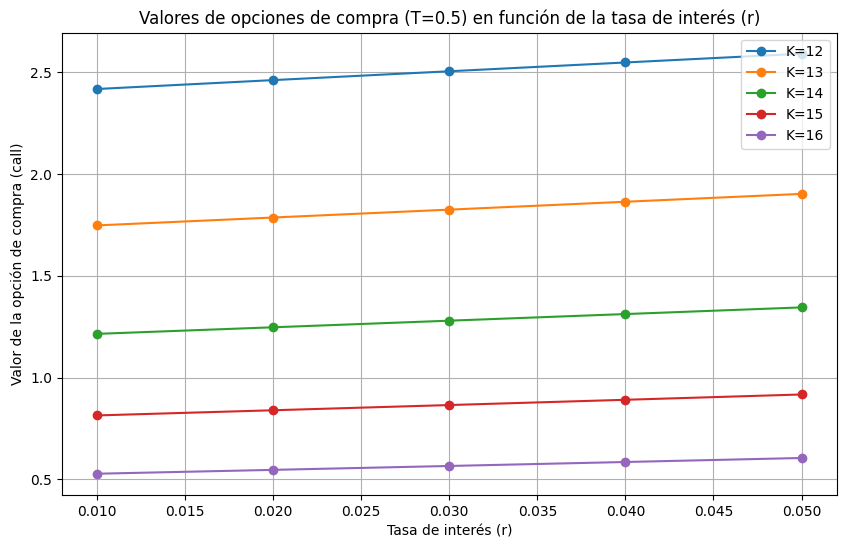

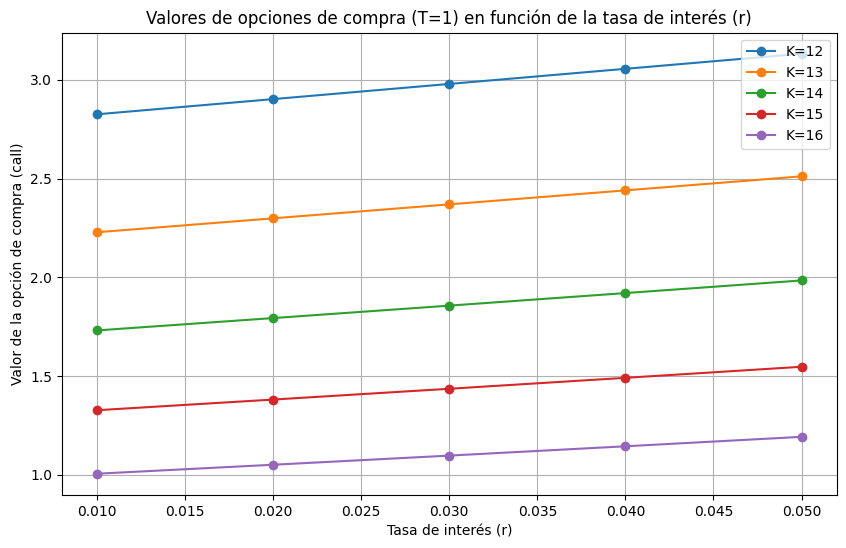

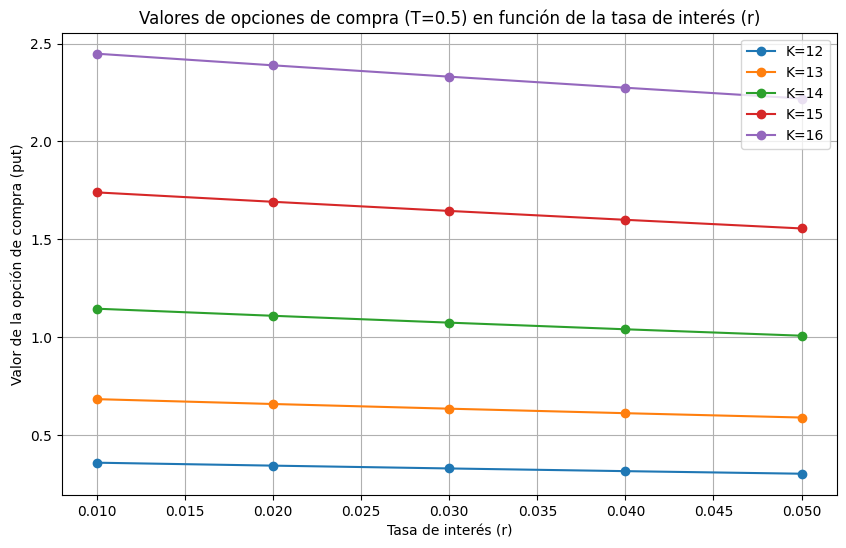

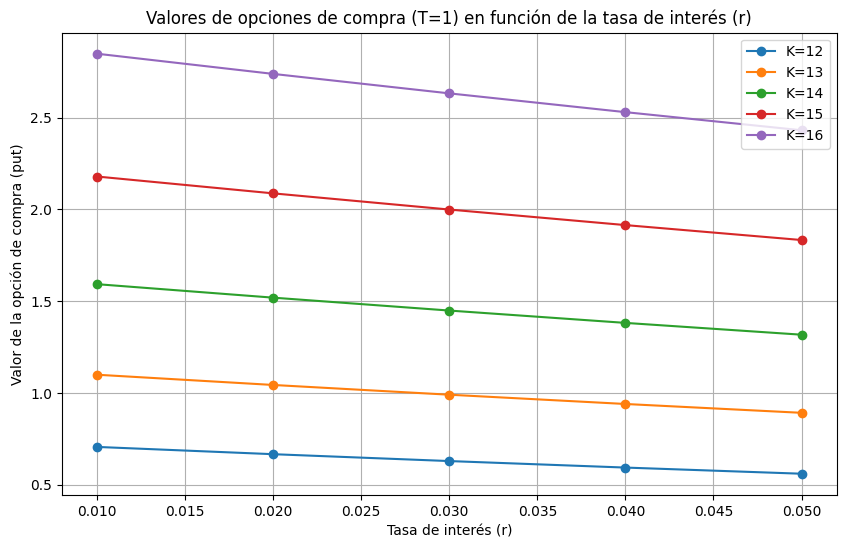

In [ ]:
# Gráfico para T=0.5
plt.figure(figsize=(10, 6))
for K_val in K_values:
    plt.plot(r_values, results_T_05.loc[str(K_val)], marker='o', label=f'K={K_val}')

plt.title('Valores de opciones de compra (T=0.5) en función de la tasa de interés (r)')
plt.xlabel('Tasa de interés (r)')
plt.ylabel('Valor de la opción de compra (call)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico para T=1
plt.figure(figsize=(10, 6))
for K_val in K_values:
    plt.plot(r_values, results_T_1.loc[str(K_val)], marker='o', label=f'K={K_val}')

plt.title('Valores de opciones de compra (T=1) en función de la tasa de interés (r)')
plt.xlabel('Tasa de interés (r)')
plt.ylabel('Valor de la opción de compra (call)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico para T=0.5
plt.figure(figsize=(10, 6))
for K_val in K_values:
    plt.plot(r_values, results_T_05_put.loc[str(K_val)], marker='o', label=f'K={K_val}')

plt.title('Valores de opciones de compra (T=0.5) en función de la tasa de interés (r)')
plt.xlabel('Tasa de interés (r)')
plt.ylabel('Valor de la opción de compra (put)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico para T=1
plt.figure(figsize=(10, 6))
for K_val in K_values:
    plt.plot(r_values, results_T_1_put.loc[str(K_val)], marker='o', label=f'K={K_val}')

plt.title('Valores de opciones de compra (T=1) en función de la tasa de interés (r)')
plt.xlabel('Tasa de interés (r)')
plt.ylabel('Valor de la opción de compra (put)')
plt.legend()
plt.grid(True)
plt.show()


Llama la atención que el ascenso en el precio de la opción call aumenta de manera lineal respecto a la tasa de interés. También se puede observar que las gráficas parecen paralelas respecto a los valores del precio de ejercicio K.

Esto puede indicar un comportamiento también lineal de el precio de la opción call respecto a el valor K. Esto lo comprobaremos en el siguiente apartado.

## 4.a.3

Se pueden observar en las tablas anteriores para T=0.5 y T=1, que según disminuye el precio de ejercicio K, el valor de la opción call aumenta.

Esto es bastante lógico, ya que al disminuir el precio de ejercicio, es más probable que la diferencia entre el precio subyacente y el precio de ejercicio sea positiva, aumentando el precio de la opción call.

Veamoslo de forma más intuitiva mediante gráficas:

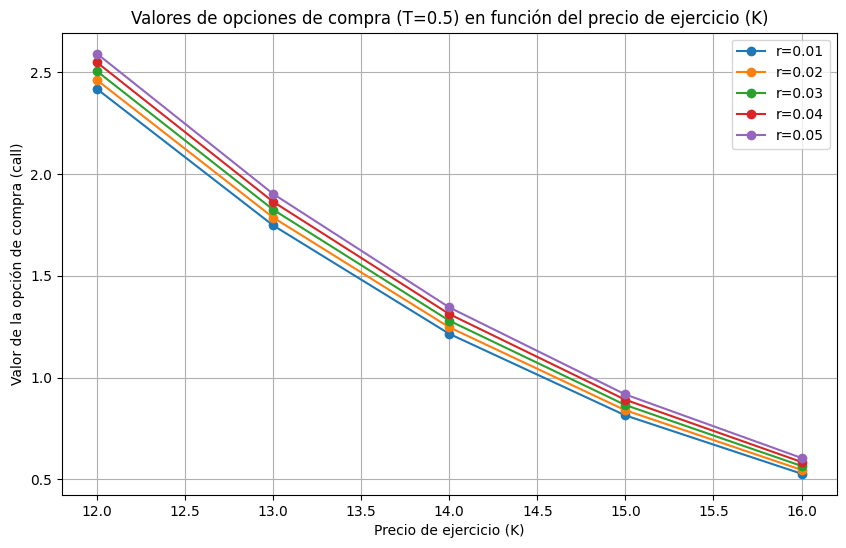

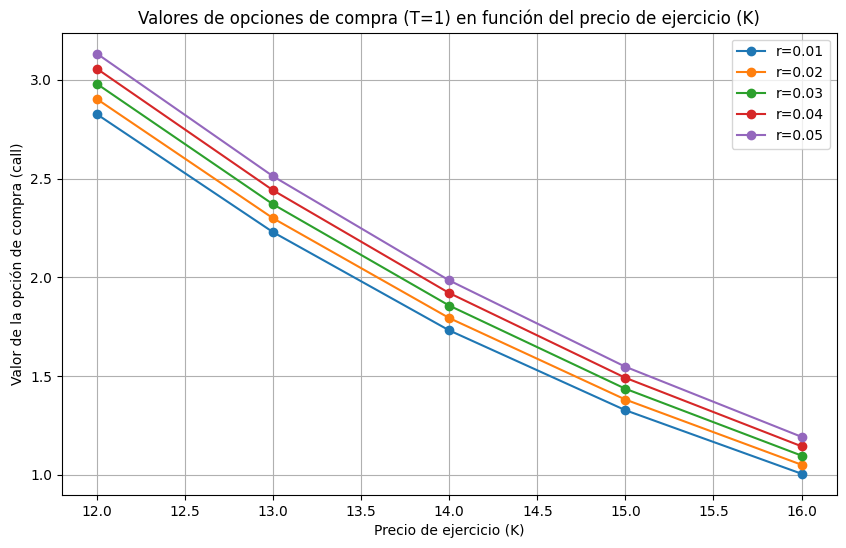

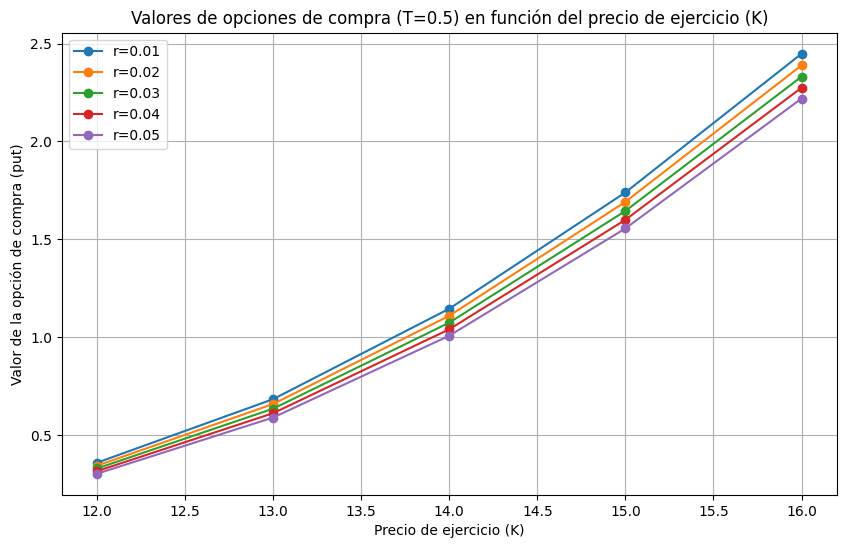

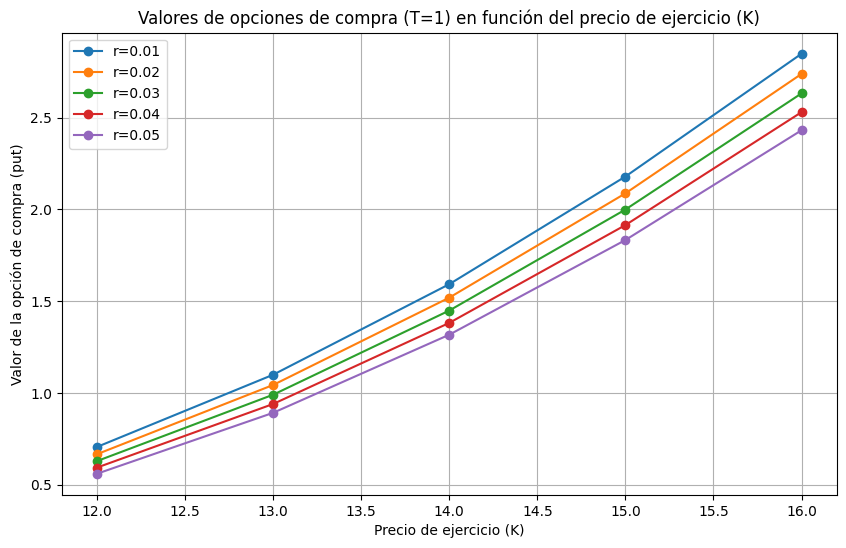

In [ ]:
# Gráfico para T=0.5
plt.figure(figsize=(10, 6))
for r_val in r_values:
    plt.plot(K_values, results_T_05[f'{r_val:.2f}'], marker='o', label=f'r={r_val}')

plt.title('Valores de opciones de compra (T=0.5) en función del precio de ejercicio (K)')
plt.xlabel('Precio de ejercicio (K)')
plt.ylabel('Valor de la opción de compra (call)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico para T=1
plt.figure(figsize=(10, 6))
for r_val in r_values:
    plt.plot(K_values, results_T_1[f'{r_val:.2f}'], marker='o', label=f'r={r_val}')

plt.title('Valores de opciones de compra (T=1) en función del precio de ejercicio (K)')
plt.xlabel('Precio de ejercicio (K)')
plt.ylabel('Valor de la opción de compra (call)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico para T=0.5
plt.figure(figsize=(10, 6))
for r_val in r_values:
    plt.plot(K_values, results_T_05_put[f'{r_val:.2f}'], marker='o', label=f'r={r_val}')

plt.title('Valores de opciones de compra (T=0.5) en función del precio de ejercicio (K)')
plt.xlabel('Precio de ejercicio (K)')
plt.ylabel('Valor de la opción de compra (put)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico para T=1
plt.figure(figsize=(10, 6))
for r_val in r_values:
    plt.plot(K_values, results_T_1_put[f'{r_val:.2f}'], marker='o', label=f'r={r_val}')

plt.title('Valores de opciones de compra (T=1) en función del precio de ejercicio (K)')
plt.xlabel('Precio de ejercicio (K)')
plt.ylabel('Valor de la opción de compra (put)')
plt.legend()
plt.grid(True)
plt.show()


Como anticipabamos, el comportamiento del precio de la opción call también es practicamente lineal respecto al valor del precio de ejercicio, aunque la gráfica es ligeramente convexa.

## 4.a.4

Para estudiar los cambios en el precio de la opción call respecto a la volatilidad $\sigma$, hemos considerado 2 tablas adiccionales.

En la primera vamos a fijar el precio de ejercicio a K=14, y estudiamos la variacion de la opción call respecto a la volatilidad y la tasa de interés.

En la segunda hemos fijado la tasa de interés a r=0.03, y estudiamos la variación de la opción call respecto a la volatilidad y el precio de ejercicio.

En ambas tablas hemos fijado T=1.

In [ ]:
results_sigma_K_14 = pd.DataFrame(index=r_values, columns=[f'{sigma_val:.2f}' for sigma_val in [0.1,0.2, 0.3, 0.4, 0.5]])
results_sigma_K_14.index.name = 'Tasa de interés (r)'
results_sigma_K_14.columns.name = 'Volatilidad '
results_sigma_K_14_put = pd.DataFrame(index=r_values, columns=[f'{sigma_val:.2f}' for sigma_val in [0.1,0.2, 0.3, 0.4, 0.5]])
results_sigma_K_14_put.index.name = 'Tasa de interés (r)'
results_sigma_K_14_put.columns.name = 'Volatilidad '

# Calcular resultados y llenar las tablas adicionales
for r_val in r_values:
    for sigma_val in [0.1,0.2, 0.3, 0.4, 0.5]:
        call_value, put_value = black_scholes(S0, 14, 1, log(1 + r_val), sigma_val, d_c)
        results_sigma_K_14.at[r_val, f'{sigma_val:.2f}'] = call_value
        results_sigma_K_14_put.at[r_val, f'{sigma_val:.2f}'] = put_value

# Mostrar las tablas adicionales
print("Variación de la opción call respecto a la volatilidad y la tasa de interés (K=14):\n")
print(results_sigma_K_14.to_string())
print('')
print('\n' + '#' * 60 + '\n')
print('')
print("Variación de la opción put respecto a la volatilidad y la tasa de interés (K=14):\n")
print(results_sigma_K_14_put.to_string())



results_sigma_r_0_03 = pd.DataFrame(index=[str(K_val) for K_val in K_values], columns=[f'{sigma_val:.2f}' for sigma_val in [0.1,0.2, 0.3, 0.4, 0.5]])
results_sigma_r_0_03.index.name = 'Precio de ejercicio (K)'
results_sigma_r_0_03.columns.name = 'Volatilidad'
results_sigma_r_0_03_put = pd.DataFrame(index=[str(K_val) for K_val in K_values], columns=[f'{sigma_val:.2f}' for sigma_val in [0.1,0.2, 0.3, 0.4, 0.5]])
results_sigma_r_0_03_put.index.name = 'Precio de ejercicio (K)'
results_sigma_r_0_03_put.columns.name = 'Volatilidad'

# Calcular resultados y llenar la tabla adicional
for K_val in K_values:
    for sigma_val in [0.1,0.2, 0.3, 0.4, 0.5]:
        call_value, put_value = black_scholes(S0, K_val, 1, log(1 + 0.03), sigma_val, d_c)
        results_sigma_r_0_03.at[str(K_val), f'{sigma_val:.2f}'] = call_value
        results_sigma_r_0_03_put.at[str(K_val), f'{sigma_val:.2f}'] = put_value

# Mostrar la tabla adicional
print('')
print('\n' + '#' * 60 + '\n')
print('')
print("Variación de la opción call respecto a la volatilidad y el precio de ejercicio (r=0.03):\n")
print(results_sigma_r_0_03.to_string())
print('')
print('\n' + '#' * 60 + '\n')
print('')
print("Variación de la opción put respecto a la volatilidad y el precio de ejercicio (r=0.03):\n")
print(results_sigma_r_0_03_put.to_string())

Variación de la opción call respecto a la volatilidad y la tasa de interés (K=14):

Volatilidad              0.10      0.20      0.30      0.40      0.50
Tasa de interés (r)                                                  
0.01                 0.627575  1.180334  1.731245  2.278266  2.819935
0.02                 0.700862  1.246891  1.793757  2.337426  2.876038
0.03                 0.777878  1.314762  1.856787  2.396725  2.932071
0.04                 0.858322  1.383855  1.920289  2.456139   2.98802
0.05                 0.941869  1.454079  1.984221  2.515644  3.043873


############################################################


Variación de la opción put respecto a la volatilidad y la tasa de interés (K=14):

Volatilidad              0.10      0.20      0.30      0.40      0.50
Tasa de interés (r)                                                  
0.01                 0.488961   1.04172  1.592631  2.139653  2.681321
0.02                 0.426353  0.972382  1.519248  2.062916  2.60152

Como vemos , segun aumenta la volatilidad, aumenta el valor de la opción call.

Esto es debido a que el aumentar la volatilidad, el precio subyacente puede obtener valores más extremos y así aumentar el precio de la valor call.

Veamos este aumento de nuevo graficamente:

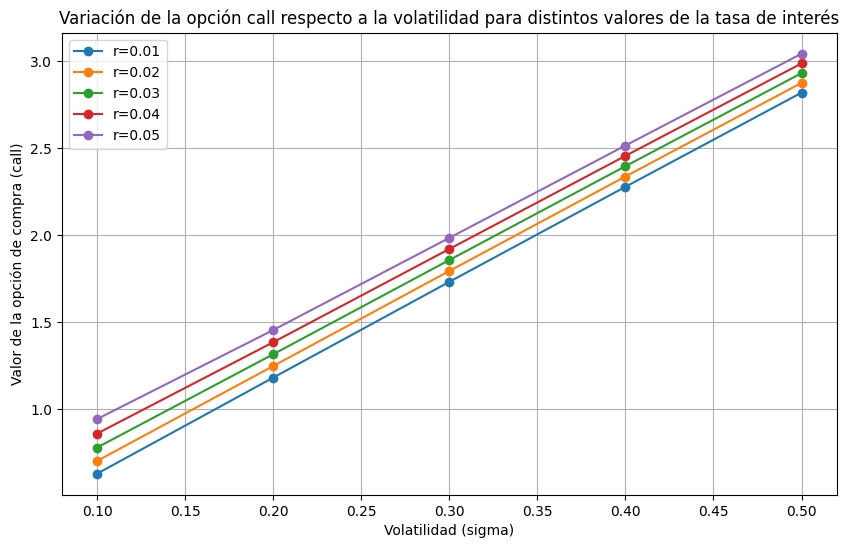

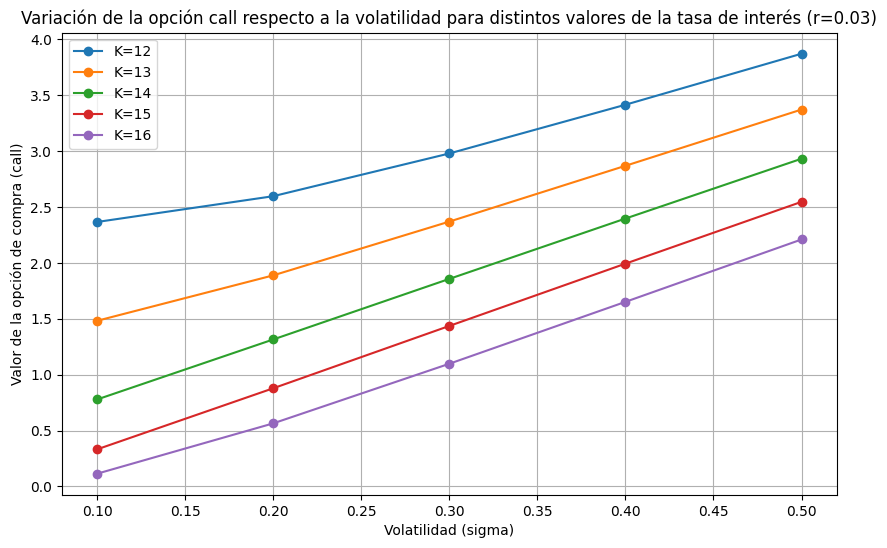

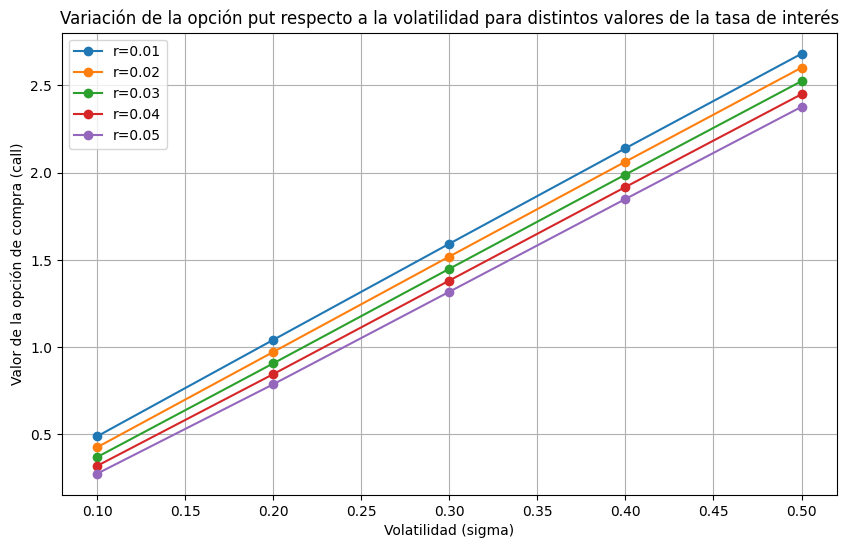

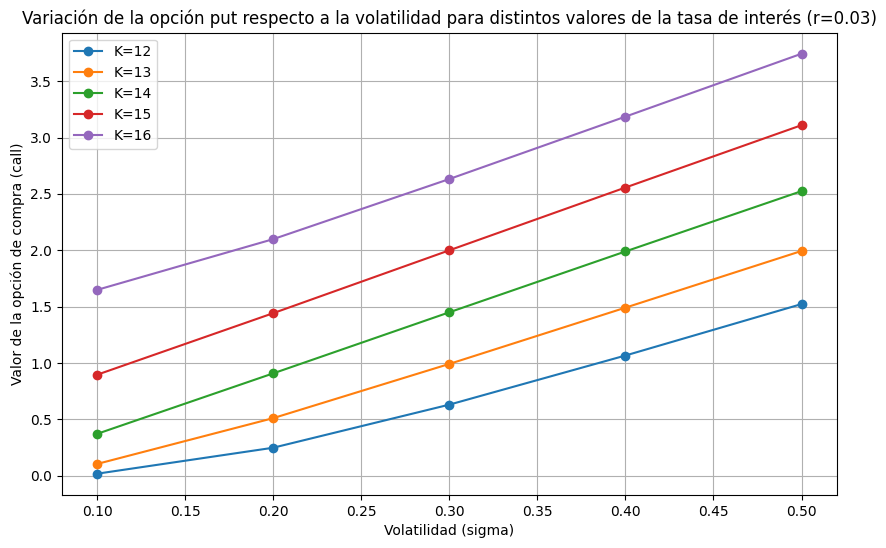

In [ ]:
# Gráfico para la variación del valor de la opción call respecto a la volatilidad (sigma) para distintos valores de la tasa de interés
plt.figure(figsize=(10, 6))
for r_val in r_values:
    plt.plot([0.1, 0.2, 0.3, 0.4, 0.5], results_sigma_K_14.loc[r_val], marker='o', label=f'r={r_val}')

plt.title('Variación de la opción call respecto a la volatilidad para distintos valores de la tasa de interés')
plt.xlabel('Volatilidad (sigma)')
plt.ylabel('Valor de la opción de compra (call)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico para la variación del valor de la opción call respecto a la volatilidad (sigma) para distintos valores de la tasa de interés (r=0.03)
plt.figure(figsize=(10, 6))
for K_val in K_values:
    plt.plot([0.1, 0.2, 0.3, 0.4, 0.5], results_sigma_r_0_03.loc[str(K_val)], marker='o', label=f'K={K_val}')

plt.title('Variación de la opción call respecto a la volatilidad para distintos valores de la tasa de interés (r=0.03)')
plt.xlabel('Volatilidad (sigma)')
plt.ylabel('Valor de la opción de compra (call)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico para la variación del valor de la opción call respecto a la volatilidad (sigma) para distintos valores de la tasa de interés
plt.figure(figsize=(10, 6))
for r_val in r_values:
    plt.plot([0.1, 0.2, 0.3, 0.4, 0.5], results_sigma_K_14_put.loc[r_val], marker='o', label=f'r={r_val}')

plt.title('Variación de la opción put respecto a la volatilidad para distintos valores de la tasa de interés')
plt.xlabel('Volatilidad (sigma)')
plt.ylabel('Valor de la opción de compra (call)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico para la variación del valor de la opción call respecto a la volatilidad (sigma) para distintos valores de la tasa de interés (r=0.03)
plt.figure(figsize=(10, 6))
for K_val in K_values:
    plt.plot([0.1, 0.2, 0.3, 0.4, 0.5], results_sigma_r_0_03_put.loc[str(K_val)], marker='o', label=f'K={K_val}')

plt.title('Variación de la opción put respecto a la volatilidad para distintos valores de la tasa de interés (r=0.03)')
plt.xlabel('Volatilidad (sigma)')
plt.ylabel('Valor de la opción de compra (call)')
plt.legend()
plt.grid(True)
plt.show()

# Razonamiento detrás de los comportamientos en opciones call europeas

## Aumento del tiempo hasta la fecha de ejercicio (T):

Un mayor plazo hasta la fecha de ejercicio brinda más tiempo para que el activo subyacente experimente movimientos favorables.

Para una opción call, un mayor tiempo aumenta la probabilidad de que el precio del activo supere el precio de ejercicio. Esto se traduce en un aumento del valor de la opción call, ya que hay más oportunidades para que el activo subyacente se mueva a favor del titular de la opción.

## Aumento del precio de ejercicio (K):

Un aumento en el precio de ejercicio implica que el activo subyacente debe aumentar más para que la opción sea rentable al vencimiento.

Para una opción call, un mayor precio de ejercicio reduce la probabilidad de que el activo subyacente supere ese precio antes de la fecha de vencimiento. Esto disminuye el valor de la opción call, ya que hay menos posibilidades de obtener beneficios significativos.

## Aumento de la volatilidad ($\sigma$):

La volatilidad se asocia con la variabilidad del precio del activo subyacente. Un aumento en la volatilidad implica una mayor probabilidad de movimientos bruscos en el precio del activo.

Para una opción call, un mayor potencial de movimientos alcistas beneficia al titular de la opción, ya que hay una mayor probabilidad de que el precio del activo subyacente supere el precio de ejercicio (K) antes de la fecha de vencimiento. Por lo tanto, un aumento en la volatilidad aumenta el valor de la opción call.


## Aumento de la tasa de interés (r):

La tasa de interés es esencialmente el "precio del dinero". Representa el costo de oportunidad de mantener el dinero en efectivo en lugar de invertirlo en algún activo que pueda generar rendimientos. Cuando hablamos de opciones, como una opción de compra (call), la tasa de interés juega un papel crucial en la valoración de la opción.

En todas las Tablas vemos cómo el precio de la acción aumenta según aumenta la tasa de interés. La intuición detrás de esto es muy sencilla: el valor actual neto del precio de ejercicio es menor cuanto mayor es la tasa de interés, y por consiguiente, mayor es el precio de la opción de compra.

<font size="4" color=blue>**Apartado b**</font>
***
Obtener mediante simulación el valor de una opción call asiática browniana con dividendos y vencimiento T. Dar la estimación del valor y la precisión. Utilizar los mismos datos que en la práctica anterior y comparar el resultado con los resultados obtenidos en esa práctica.

<font size="2" color=grey>**Nota para comprobación:** $t=1; V_{\mathrm{call}}=1.213168;Varianza=3.244590;Precisión=0.111778$.</font>

### Ejercicio 4.b

${Opciones\  Europeas:}$

Las opciones europeas son contratos financieros que otorgan a su titular el derecho, pero no la obligación, de comprar (opción call) o vender (opción put) un activo subyacente a un precio preestablecido (precio de ejercicio) en una fecha específica de vencimiento.

\[
$\text{Payoff}_{\text{call}} = \max(S_T - K, 0)$
\]

${Opciones\ Asiáticas:}$

Las opciones asiáticas son contratos financieros en los que el precio de ejercicio se determina en función del precio promedio del activo subyacente durante un período específico. El titular tiene el derecho, pero no la obligación, de comprar (opción call) o vender (opción put) el activo subyacente a este precio promedio en una fecha de ejercicio determinada.

\[
$\text{Payoff}_{\text{call}} = \max(A - K, 0)$
\]

donde $A$ es el promedio del activo subyacente durante un periodo de tiempo específico.

Nota: Se utiliza el mecanismo de transicion usado en 2.b.3

In [ ]:
def simulacion_transicion_asiatica(num_simul, S0, r, d, sigma, T, intervalos,x0):
    S_sim = np.zeros(num_simul)
    delta_t = 1 / intervalos

    for i in range(num_simul):
        S = S0
        subyacentes=[]
        for j in range(intervalos*T):
            x, y, x0 = BoxMuller(x0)
            S = S * (1 + r - d) ** delta_t + sigma * S * sqrt(delta_t) * y
            subyacentes.append(S)
        S_sim[i] = np.mean(subyacentes)
    return S_sim, x0

# Parámetros del modelo
num_simul = 1000
S0 = 14
r = 0.03
d = 0
sigma = 0.3
intervalos = 12
x0 = 123456789
K= 14
precision_alpha = 0.05
T=[1,2,3]

for tiempo in T:
  # Llamada a la función
  S_sim,x0= simulacion_transicion_asiatica(num_simul, S0, r, d, sigma, tiempo, intervalos, x0)

  #Resultados
  Payoff_transicion_call = np.maximum(S_sim - K, 0)
  E_p_transicion_call = np.mean(Payoff_transicion_call)
  S_p_transicion_call = np.var(Payoff_transicion_call, ddof=1)
  S_call_transicion = exp(-r_c * tiempo) ** 2 * S_p_transicion_call
  call_value_transicion = exp(-r_c * tiempo) * E_p_transicion_call
  precision_transicion_call = calcular_precision(num_simul, r_c, tiempo, S_p_transicion_call,precision_alpha)

  Payoff_transicion_put = np.maximum(K-S_sim, 0)
  E_p_transicion_put = np.mean(Payoff_transicion_put)
  S_p_transicion_put = np.var(Payoff_transicion_put, ddof=1)
  S_put_transicion = exp(-r_c * tiempo) ** 2 * S_p_transicion_put
  put_value_transicion = exp(-r_c * tiempo) * E_p_transicion_put
  precision_transicion_put = calcular_precision(num_simul, r_c, tiempo, S_p_transicion_put,precision_alpha)

  print('')
  print(f'Valor de la opción Vcall para T={tiempo}: {call_value_transicion:.8f}')
  print('Varianza:', S_call_transicion)
  print('Precisión:', precision_transicion_call)
  print('')
  print(f'Valor de la opción Vput para T={tiempo}: {put_value_transicion:.8f}')
  print('Varianza:', S_put_transicion)
  print('Precisión:', precision_transicion_put)
  print('')
  print('S1= %.8f S2= %.8f S3= %.8f ...' % (S_sim[0], S_sim[1], S_sim[2]))
  print('')
  print('##############################')


Valor de la opción Vcall para T=1: 1.21316821
Varianza: 3.2445903696089724
Precisión: 0.11177753224400995

Valor de la opción Vput para T=1: 0.83545689
Varianza: 1.427481777220789
Precisión: 0.07414124359900627

S1= 13.00489953 S2= 14.94483182 S3= 10.00755333 ...

##############################

Valor de la opción Vcall para T=2: 1.50253744
Varianza: 6.677629177335655
Precisión: 0.1603561899689258

Valor de la opción Vput para T=2: 1.18246923
Varianza: 2.535003129699698
Precisión: 0.09880156637097848

S1= 12.06746604 S2= 15.04019771 S3= 17.06631365 ...

##############################

Valor de la opción Vcall para T=3: 1.90132047
Varianza: 9.89818402206141
Precisión: 0.19523260168582668

Valor de la opción Vput para T=3: 1.32037515
Varianza: 3.124944222095384
Precisión: 0.10969724355172869

S1= 14.12873635 S2= 13.35638031 S3= 10.44079590 ...

##############################


Veamos la comparación de los resultados obtenidos para la opción asiática con los de los anteriores ejercicios para T=1.

Reciclamos el diccionario y tablas creados anteriormente:

In [ ]:
resultados['4.b Asia'] = {'Vcall': 1.213, 'Varianza': 3.244, 'Precisión': 0.111}

# Actualizar la tabla con la nueva entrada
tabla.add_row(['4.b Asia', resultados['4.b Asia']['Vcall'], resultados['4.b Asia']['Varianza'], resultados['4.b Asia']['Precisión']])

# Imprimir la tabla
print(tabla)

+----------+-------+----------+-----------+
|  Método  | Vcall | Varianza | Precisión |
+----------+-------+----------+-----------+
| 2.a B-S  | 1.856 |    0     |     0     |
|  2.b.1   | 1.919 |  10.065  |   0.196   |
|  2.b.2   | 2.008 |  10.349  |   0.199   |
|  2.b.3   | 2.005 |  10.02   |   0.196   |
|    3     |  1.84 |  8.169   |   0.177   |
| 4.b Asia | 1.213 |  3.244   |   0.111   |
+----------+-------+----------+-----------+


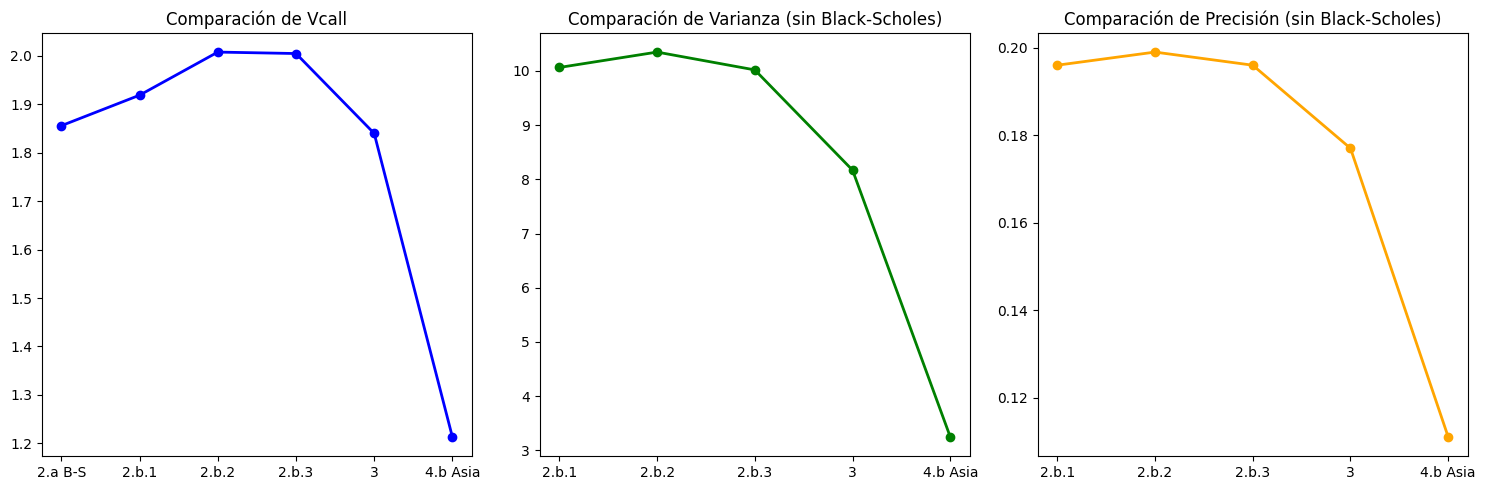

In [ ]:
# Extraer datos para cada método
metodos = list(resultados.keys())
vcall = [resultados[metodo]['Vcall'] for metodo in metodos]
varianza = [resultados[metodo]['Varianza'] for metodo in metodos]
precision = [resultados[metodo]['Precisión'] for metodo in metodos]

# Filtrar datos para Varianza y Precisión sin incluir '2.a Black-Scholes'
metodos_sin_black_scholes = [metodo for metodo in metodos if metodo != '2.a B-S']
varianza_sin_black_scholes = [resultados[metodo]['Varianza'] for metodo in metodos_sin_black_scholes]
precision_sin_black_scholes = [resultados[metodo]['Precisión'] for metodo in metodos_sin_black_scholes]

# Gráficos de líneas para Vcall
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(metodos, vcall, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Comparación de Vcall')

# Gráficos de líneas para Varianza sin '2.a Black-Scholes'
plt.subplot(1, 3, 2)
plt.plot(metodos_sin_black_scholes, varianza_sin_black_scholes, marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Comparación de Varianza (sin Black-Scholes)')

# Gráficos de líneas para Precisión sin '2.a Black-Scholes'
plt.subplot(1, 3, 3)
plt.plot(metodos_sin_black_scholes, precision_sin_black_scholes, marker='o', color='orange', linestyle='-', linewidth=2)
plt.title('Comparación de Precisión (sin Black-Scholes)')

plt.tight_layout()
plt.show()

<font size="6"><center><span style="color:blue">***Práctica 5***</span></center></font>

- **(b.)** Obtener mediante simulación el valor de una estrategia **butterfly** formada por la compra de una opción call europea con strike $K$, la compra de otra opción europea con strike $K'>K$ y la venta de dos opciones call europeas con strike $K''$ tal que $K<K''<K'$, todas sobre el mismo subyacente.  
Aplicarlo suponiendo los datos de las prácticas anteriores con $K = 14, K' = 16$ y $K'' = 15$.

- **(a.)** Teniendo en cuenta las consideraciones anteriores y dependiendo del resultado del subyacente define y muestra la tabla de payoffs antes de desarrollar el código.  

- **(c.)** Grafica el resultado y comprueba que el gráfico tiene la misma forma que lo ya visto en la parte de teoría.

- **(d.)** Muestra graficamente cual sería el beneficio obtenido, es decir, considerando el coste de la prima.

- **(e.)** Los mismos apartados anteriores para una estrategia **strangle** (tipo cuna, forma parte de la especulativas) formada por la compra de una opción call europea con strike $K'$ y una opción put con strike $K$, con $K'>K$.

### Ejercicio 5.a

Consiste en la compra de una opción call con un strike, otra opción
call con un strike mayor y la venta de dos opciones call con un strike
intermedio entre los anteriores, todas las opciones a la misma fecha de
vencimiento.

Se pretende obtener beneficios si el valor del subyacente está entre los
dos strikes mínimo y máximo, lo que implicaría un precio mayor de
las opciones vendidas que de las compradas.


Hay que suponer K''=(K+K')/2.

VEstrategia (Valor de la Estrategia) = CompraK-2*VentaK''+CompraK'.

Nota: En la tabla aparece en la columna VentaK'' el valor de Payoff(S,K'').

In [ ]:
# Define tus datos
data = {
    'Compra K': [0, 'S-K','S-K', 'S-K'],
    'Venta K\'\'': [0, 0, 'S-K\'\'', 'S-K\'\''],
    'Compra K\'': [0, 0, 0, 'S-K\''],
    'VEstrategia' : [0, 'S-K','K\'-S',0]
}

# Crea un DataFrame con los datos y define los nombres de las filas
df = pd.DataFrame(data, index=['S<K', 'K<S<K\'\'', 'K\'\'<S<K\'', 'S>K\''])

# Muestra la tabla
print(df)


         Compra K Venta K'' Compra K' VEstrategia
S<K             0         0         0           0
K<S<K''       S-K         0         0         S-K
K''<S<K'      S-K     S-K''         0        K'-S
S>K'          S-K     S-K''      S-K'           0


### Ejercicio 5.b y 5.c

Usaremos los parámetros y el método de transición utilizado en el ejercicio 3 para simular los valores del precio subyacente.

El cálculo se hace para T=1 y 1000 simulaciones.

He añadido también en las gráficas los valores de CompraK1 = Payoff(K1,S),
-VentaK2 = -Payoff(S,K2) y Comprak3 = Payoff(S,K3).

Se añade también un histograma del precio de la Estrategia.

K2 representa K'', K1 representa K y K3 representa K'.

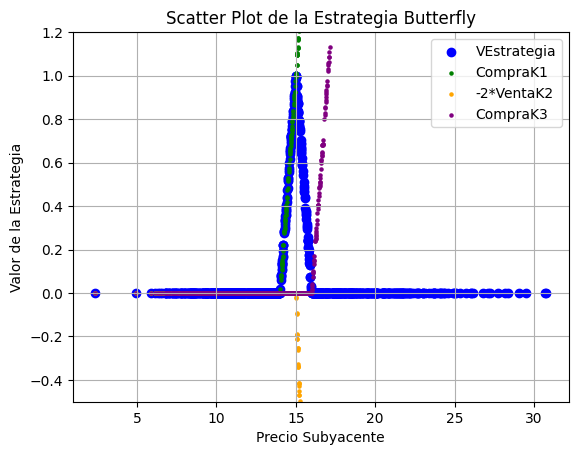

In [ ]:
#Parámetros simulación precio subyacente
num_simul = 1000
S0 = 14
r = 0.03
r_c = log(1+r)
d = 0
d_c = log(1+d)
sigma = 0.3
intervalos = 12
x0 = 123456789
K = 14
n=6
T=1

#Calculamos los valores simulados Precio Subyacente (Reciclamos la función del ejercicio 3)
S_sim = simulacion_dinamica3(num_simul, S0, r_c, d_c, sigma, n, T, intervalos,x0)

#Parámetros y calculos para calcular el valor de la estrategia.
K1=14
K2=15
K3=16
CompraK1 = np.maximum(S_sim - K1, 0)
VentaK2= np.maximum(S_sim - K2, 0)
CompraK3 = np.maximum(S_sim - K3, 0)
VEstrategia = CompraK1-2*VentaK2+CompraK3

# Crear el scatter plot
plt.scatter(S_sim, VEstrategia, marker='o', color='blue', label='VEstrategia')

# Graficar las curvas de CompraK1, VentaK2, y CompraK3 con líneas y colores diferentes
plt.scatter(S_sim, CompraK1, label='CompraK1', color='green', s=5)
plt.scatter(S_sim, -2*VentaK2, label='-2*VentaK2', color='orange', s=5)
plt.scatter(S_sim, CompraK3, label='CompraK3', color='purple', s=5)

plt.title('Scatter Plot de la Estrategia Butterfly')
plt.xlabel('Precio Subyacente')
plt.ylabel('Valor de la Estrategia')
plt.legend()
plt.ylim(-0.5, 1.2)  # Ajustar límites del eje y
plt.grid(True)
plt.show()



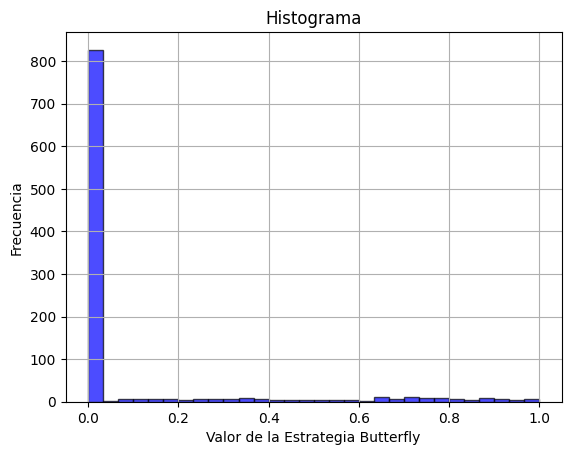

In [ ]:
# Crear un histograma de los valores de VEstrategia
plt.hist(VEstrategia, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histograma')
plt.xlabel('Valor de la Estrategia Butterfly')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Se puede observar que para la mayoría de precios en el Valor Subyacente, el valor de la estrategia es 0, por lo que parece que no es muy rentable este tipo de estrategia.

### Ejercicio 5.d

Calculamos el valor de las opciones call ejercidas, para así calcular el valor de la prima total de la estrategia.

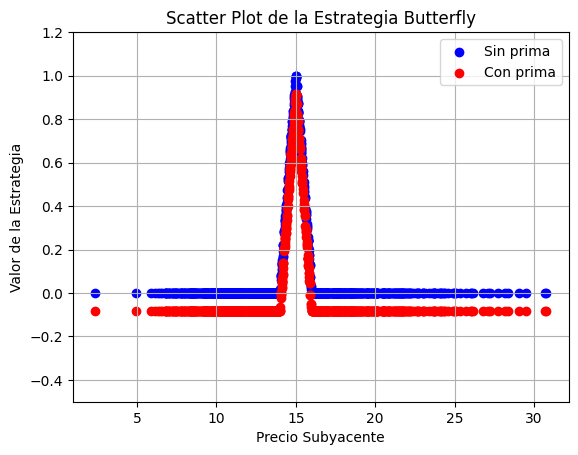

In [ ]:
#Inicialización parametros
r = 0.03
r_c = log(1+r)
T = 1
sigma = 0.3
S0 = 14
d = 0
d_c = log(1+d)

#Calculo Valor opciones mediante Black-Scholes.
VcallK1, VputK1 = black_scholes(S0, K1, T, r, sigma, d) #Lo dejamos ya calculado (VputK1) para la siguiente estrategia.
VcallK2,_  = black_scholes(S0, K2, T, r, sigma, d)
VcallK3,_ = black_scholes(S0, K3, T, r, sigma, d)

VEstrategia_menos_prima = VEstrategia+2*VcallK2-VcallK1-VcallK3

# Crear el scatter plot
plt.scatter(S_sim, VEstrategia, marker='o', color='blue', label='Sin prima')

plt.scatter(S_sim, VEstrategia_menos_prima, marker='o', color='red', label='Con prima')

plt.title('Scatter Plot de la Estrategia Butterfly')
plt.xlabel('Precio Subyacente')
plt.ylabel('Valor de la Estrategia')
plt.legend()
plt.ylim(-0.5, 1.2)
plt.grid(True)
plt.show()



### Ejercicio 5.d

Consiste en la compra de una opción call y una opción put con strikes
diferentes.

Se pretende lo mismo que con una strategia straddle pero a precio
más económico ya que la diferencia de strikes permitirá obtener una
compra a menor precio.

Reciclamos el S_Sim calculado anteriormente.
También los valores de K1 y K3.

En este caso VEstrategia = CompraPutK+CompraCallK'

In [ ]:
# Define tus datos
data = {
    'Compra put K': ['K-S', 0, 0],
    'Compra Call K\'': [0, 0, 'S-K\''],
    'VEstrategia' : ['K-S', 0,'S-K\'']
}

# Crea un DataFrame con los datos y define los nombres de las filas
df = pd.DataFrame(data, index=['S<K', 'K<S<K\'\'', 'S>K\''])

# Calcula la columna VEstrategia
#df['VEstrategia'] = df['Compra K'] + 2 * df['Venta K\'\''] + df['Compra K\'']

# Muestra la tabla
print(df)

        Compra put K Compra Call K' VEstrategia
S<K              K-S              0         K-S
K<S<K''            0              0           0
S>K'               0           S-K'        S-K'


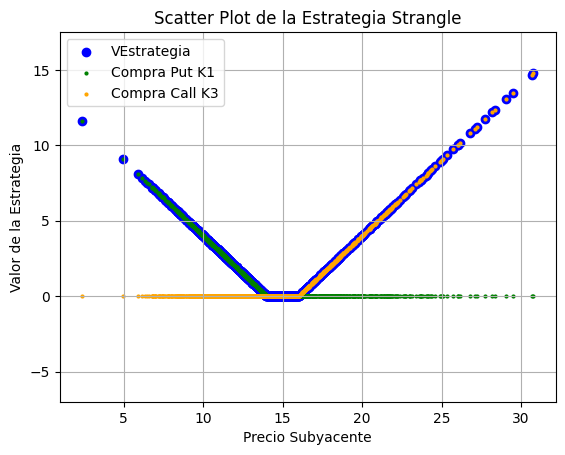

In [ ]:
#Parámetros y calculos para calcular el valor de la estrategia.
Compra_putK1 = np.maximum(K1-S_sim, 0)
Compra_callK3 = np.maximum(S_sim - K3, 0)
VEstrategia_Strangle = Compra_putK1+Compra_callK3

# Crear el scatter plot
plt.scatter(S_sim, VEstrategia_Strangle, marker='o', color='blue', label='VEstrategia')

# Graficar las curvas de CompraK1, VentaK2, y CompraK3 con líneas y colores diferentes
plt.scatter(S_sim, Compra_putK1, label='Compra Put K1', color='green', s=4)
plt.scatter(S_sim, Compra_callK3, label='Compra Call K3', color='orange', s=4)

plt.title('Scatter Plot de la Estrategia Strangle')
plt.xlabel('Precio Subyacente')
plt.ylabel('Valor de la Estrategia')
plt.legend()
plt.ylim(-7, 17.5)  # Ajustar límites del eje y
plt.grid(True)
plt.show()


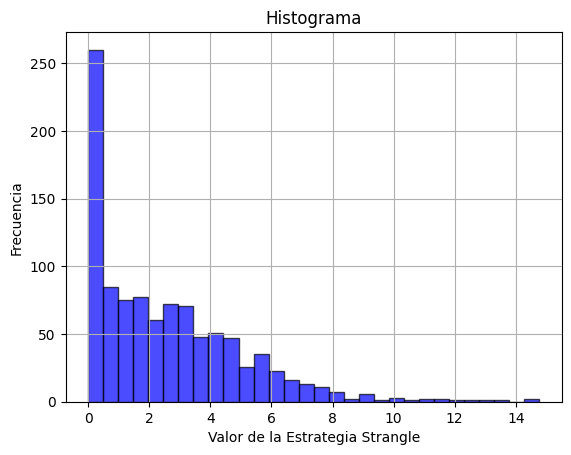

In [ ]:
# Crear un histograma de los valores de VEstrategia
plt.hist(VEstrategia_Strangle, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histograma')
plt.xlabel('Valor de la Estrategia Strangle')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Parece que ahora los valores no solo se distribuyen alrededor del 0, por lo que sería más rentable en este caso la estrategia que la anterior a priori.

Veamos ahora el valor de la estrategia al restarle la prima.

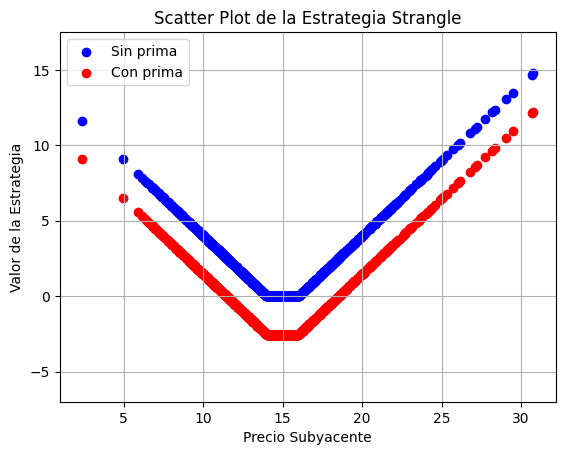

In [ ]:
VEstrategia_Strangle_menos_prima = VEstrategia_Strangle-VputK1-VcallK3

# Crear el scatter plot
plt.scatter(S_sim, VEstrategia_Strangle, marker='o', color='blue', label='Sin prima')

plt.scatter(S_sim, VEstrategia_Strangle_menos_prima, marker='o', color='red', label='Con prima')

plt.title('Scatter Plot de la Estrategia Strangle')
plt.xlabel('Precio Subyacente')
plt.ylabel('Valor de la Estrategia')
plt.legend()
plt.ylim(-7, 17.5)
plt.grid(True)
plt.show()


<font size="6"><center><span style="color:blue">***Práctica 6***</span></center></font>

- **(a.)** Obtener mediante el método binomial el valor de una opción call europea y una opción put europea con los datos de la práctica 2 y comparar el resultado de la estimación con la obtenida en tal práctica. Usar $n = 100$ $(\delta t = 1/100)$

Vamos a calcular el precio de una opción call mediante el método binomial de 2 formas, una con un proceso iterativo, y otra con la formula estimada del valor de la opción.

Valoraremos en el método con la formula estimada el valor de las opciones put y call para T=1 y T=2.

In [ ]:
def opcion_metodo_binomial(S, K, r_c, sigma, T, n):
    # Calcula los parámetros del modelo binomial
    delta_t = T / n
    u = exp(sigma * sqrt(delta_t))
    d = 1 / u
    p = (exp(r_c * delta_t) - d) / (u - d)

    # Inicializa la matriz de precios de la opción
    option_prices = [[0 for j in range(n + 1)] for i in range(n + 1)]

    # Llena la matriz de precios de la opción al final del período
    for j in range(n + 1):
        option_prices[n][j] = max(0, S * (u ** (2 * j - n)) - K)

    # Calcula el precio de la opción en cada período hacia atrás
    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            option_prices[i][j] = exp(-r_c * delta_t) * (p * option_prices[i + 1][j + 1] + (1 - p) * option_prices[i + 1][j])

    # El precio de la opción en el tiempo inicial
    return option_prices[0][0]

r = 0.03
r_c = log(1+r)
K = 14
T = 1
sigma = 0.3
S0 = 14
n=100
delta_t=1/100

call_price= opcion_metodo_binomial(S0, K, r_c, sigma, T, n)
print(f'El precio de la opción call europea para T=1 es: {call_price}')

El precio de la opción call europea para T=1 es: 1.8526605395299103


In [ ]:
def opcion_metodo_binomial_2(S, K, r_c, sigma, T, n):
    # Calcula los parámetros del modelo binomial
    delta_t = T / n
    u = exp(sigma * sqrt(delta_t))
    d = 1 / u
    p = (exp(r_c * delta_t) - d) / (u - d)

    sum_formula_call = 0
    sum_formula_put = 0

    # Calcula la suma de la fórmula
    for k in range(1, n + 1):
        term1 = comb(n, k)
        term2 = p ** k
        term3 = (1 - p) ** (n - k)
        term_call = max(S * (u ** (2 * k - n)) - K, 0)
        term_put = max(K- S * (u ** (2 * k - n)), 0)
        sum_formula_call += term1 * term2 * term3 * term_call
        sum_formula_put += term1 * term2 * term3 * term_put

    # Calcula el precio de la opción de compra europea
    precio_call = exp(-r_c * T) * sum_formula_call
    precio_put = exp(-r_c * T) * sum_formula_put

    return precio_call, precio_put

r = 0.03
r_c = log(1+r)
K = 14
T = 1
sigma = 0.3
S0 = 14
n=100
delta_t=1/100

call_price,put_price= opcion_metodo_binomial_2(S0, K, r_c, sigma, T, n)
print(f'El precio de la opción call europea para T=1 es: {call_price}')
print(f'El precio de la opción put europea para T=1 es: {put_price}')

T=2
n=200

call_price,put_price= opcion_metodo_binomial_2(S0, K, r_c, sigma, T, n)
print(f'El precio de la opción call europea para T=2 es: {call_price}')
print(f'El precio de la opción put europea para T=2 es: {put_price}')

T=3
n=300

call_price,put_price= opcion_metodo_binomial_2(S0, K, r_c, sigma, T, n)
print(f'El precio de la opción call europea para T=3 es: {call_price}')
print(f'El precio de la opción put europea para T=3 es: {put_price}')

El precio de la opción call europea para T=1 es: 1.85266053952991
El precio de la opción put europea para T=1 es: 1.4448935492385362
El precio de la opción call europea para T=2 es: 2.7051915518862786
El precio de la opción put europea para T=2 es: 1.9015342797586123
El precio de la opción call europea para T=3 es: 3.3787547183049513
El precio de la opción put europea para T=3 es: 2.1907379492488364


Nota: A medida que se ha aumentado T, se ha aumentado tambien n, para que delta\_t siga siendo 1/100.

Se puede observar que coinciden ambas formas para la opción call y T=1.

Veamos la comparación del precio de las opciones obtenidas mediante este método, con los obtenidos en la práctica 2 mediante e método de Black-Scholes.

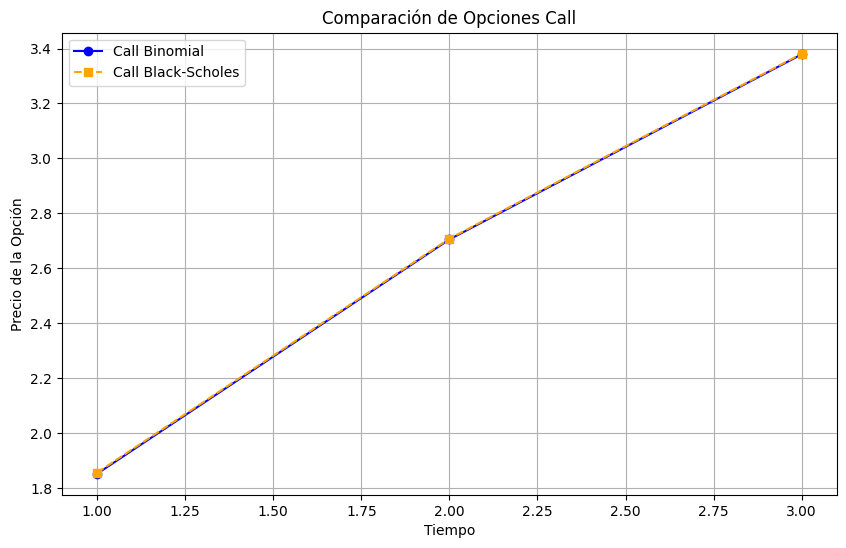

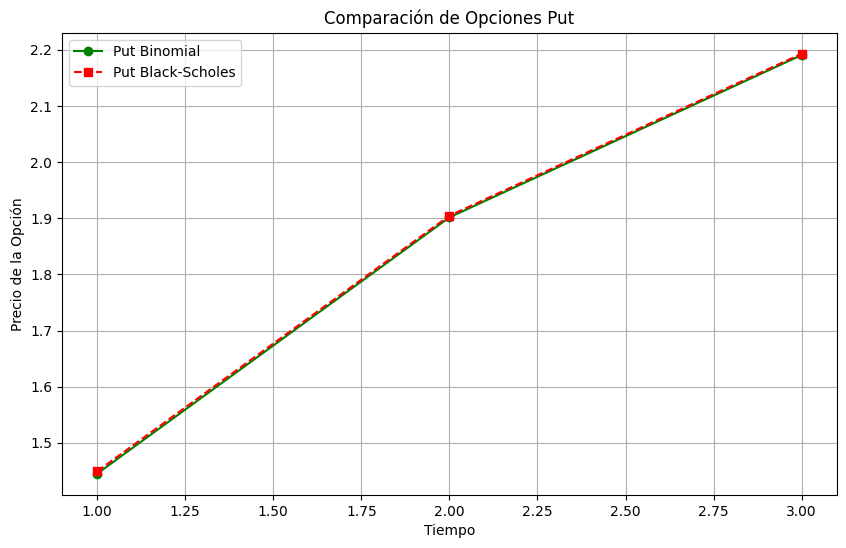

In [ ]:
# Datos del método binomial
tiempos = [1, 2, 3]

call_binomial = [1.85266053952991, 2.7051915518862786, 3.3787547183049513]
put_binomial = [1.4448935492385362, 1.9015342797586123, 2.1907379492488364]

# Datos de Black-Scholes
call_bs = [1.85678671, 2.70807015, 3.38107201]
put_bs = [1.44901972, 1.90441288, 2.19305524]

# Graficar opciones call
plt.figure(figsize=(10, 6))
plt.plot(tiempos, call_binomial, label='Call Binomial', marker='o', linestyle='-', color='blue')
plt.plot(tiempos, call_bs, label='Call Black-Scholes', marker='s', linestyle='--', color='orange')

plt.title('Comparación de Opciones Call')
plt.xlabel('Tiempo')
plt.ylabel('Precio de la Opción')
plt.legend()
plt.grid(True)
plt.show()

# Graficar opciones put
plt.figure(figsize=(10, 6))
plt.plot(tiempos, put_binomial, label='Put Binomial', marker='o', linestyle='-', color='green')
plt.plot(tiempos, put_bs, label='Put Black-Scholes', marker='s', linestyle='--', color='red')

plt.title('Comparación de Opciones Put')
plt.xlabel('Tiempo')
plt.ylabel('Precio de la Opción')
plt.legend()
plt.grid(True)
plt.show()


Como se observa, los valores son curiosamente practicamente los mismos.

- **(b.)** Representa gráficamente el valor de la opción call obtenido mediante el método binomial respecto de diferentes valores de $n$ (por ejemplo desde n=20 hasta n=100) y muestra como referencia el valor obtenido mediante la fórmula de Black-Scholes como una constante. ¿Qué sucede?

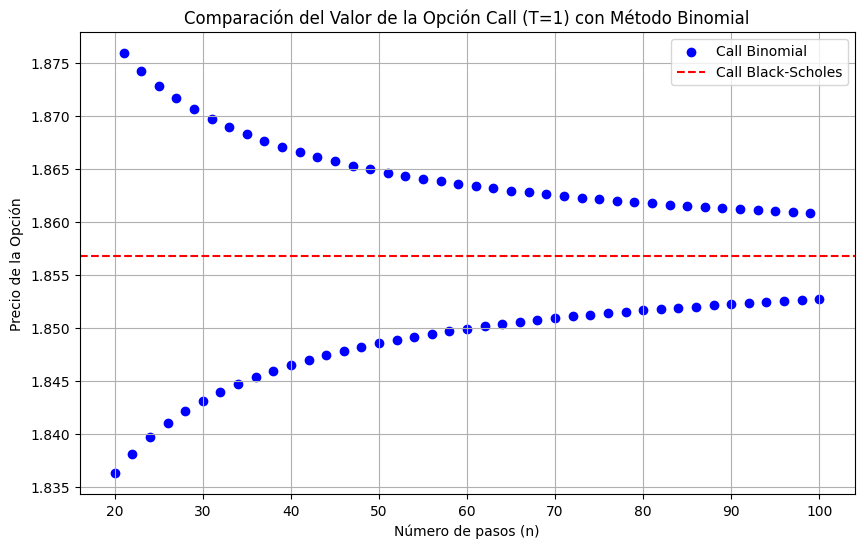

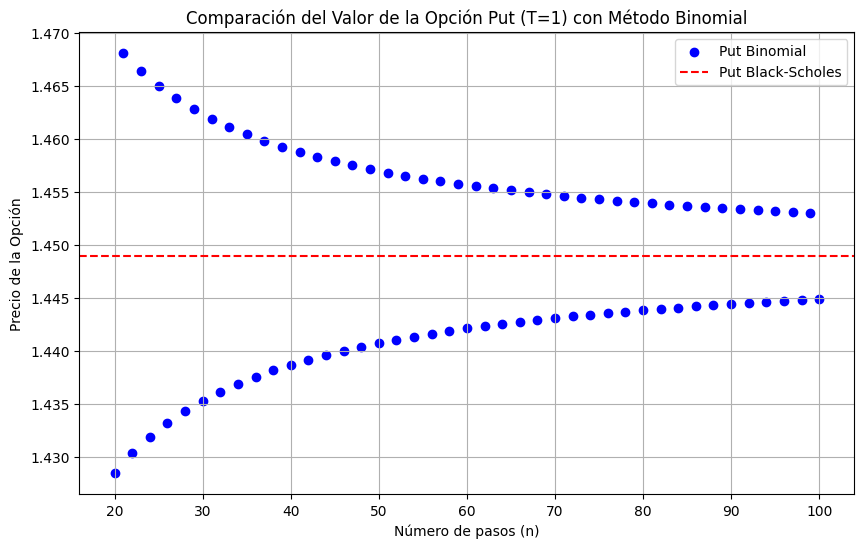

In [ ]:
# Parámetros
r = 0.03
r_c = log(1+r)
K = 14
T = 1
sigma = 0.3
S0 = 14

# Valores de n
n_values = np.arange(20, 101, 1)


call_prices_binomial = []
put_prices_binomial = []

# Datos de Black-Scholes
call_bs = 1.85678671
put_bs = 1.44901972

for n in n_values:
  # Calcular precio de opción call con método binomial y Black-Scholes
  call_price, put_price = opcion_metodo_binomial_2(S0, K, r_c, sigma, T, n)
  call_prices_binomial.append(call_price)
  put_prices_binomial.append(put_price)

# Graficar resultados para opción call
plt.figure(figsize=(10, 6))
plt.scatter(n_values, call_prices_binomial, label='Call Binomial', color='blue')
plt.axhline(y=call_bs, color='red', linestyle='--', label='Call Black-Scholes')

plt.title('Comparación del Valor de la Opción Call (T=1) con Método Binomial')
plt.xlabel('Número de pasos (n)')
plt.ylabel('Precio de la Opción')
plt.legend()
plt.grid(True)
plt.show()

# Graficar resultados para opción call
plt.figure(figsize=(10, 6))
plt.scatter(n_values, put_prices_binomial, label='Put Binomial', color='blue')
plt.axhline(y=put_bs, color='red', linestyle='--', label='Put Black-Scholes')

plt.title('Comparación del Valor de la Opción Put (T=1) con Método Binomial')
plt.xlabel('Número de pasos (n)')
plt.ylabel('Precio de la Opción')
plt.legend()
plt.grid(True)
plt.show()

Como vemos , según aumentamos el número de pasos, parece que el método binomial va convergiendo a la fórmula de Black- Scholes. Además, hay que tener en cuenta la escala en el eje de las y, que es muy pequeño, por lo tanto son valores muy cercanos.

<font size="6"><center><span style="color:blue">***Práctica final MNFI 2.024***</span></center></font>

Obtener los valores de una opción call y una opción put europeas con vencimiento T=21,52 semanas para los siguientes subyacentes:

In [ ]:
assetsIBEX=['AENA.MC','TEF.MC', 'IDR.MC', 'MRL.MC', 'ITX.MC', 'IBE.MC','ELE.MC','NTGY.MC','BBVA.MC','REP.MC']

In [ ]:
assetsNASDAQ=['MNST','NVDA','ABNB','AAPL','TSLA','MSFT','AMZN','SBUX','PEP','WBD','LULU','EA','NFLX']

Con las siguientes consideraciones:   


1. Obtener el valor final del subyacente mediante simulación dinámica con Δt que mejor consideres,argumentándolo, y el mecanismo de transición (ecuación estocástica):

<font size="2">
$$
S \leftarrow S + S(r_{\Delta t} - d_{\Delta t})+\sigma S \sqrt{\Delta t}\mathcal{N}(0,1) = S(1+r-d)^{\Delta t} + \sigma S \sqrt{\Delta t} \mathcal{N}(0,1)
$$
</font>


2. Datos:
    
-  S0=Valor de cierre del subyacente 22-1-2024.  
-  Strike= S0.
-  r rendimiento del bono alemán a 10 años a 22-1-2024.
-  𝜎 del subyacente calculada sobre los 100 últimos datos disponibles.
-  d basado en dividendos último año.
-  Iteraciones: 1000, semilla inicial: 123456789
   
   
3. Obtener una tabla de resultados de la siguiente forma:


<img src="Tabla de resultados 2023.png" style="height: 200px">
<center style="color:#888"><br/></center>


4. **Importante:** Incluid un informe final sobre los resultados que contenga conclusiones y recomendaciones.

In [ ]:
assets=assetsIBEX + assetsNASDAQ

In [ ]:
df=pd.read_pickle("historico_desde_2022_trabajo_MNFI.pkl")

In [ ]:
df.head(2)

Adj Close                                                \
                  AAPL        ABNB     AENA.MC        AMZN   BBVA.MC   
Date                                                                   
2022-01-03  179.953888  172.679993  137.782410  170.404495  4.575069   
2022-01-04  177.669983  170.800003  139.962509  167.522003  4.690751   

                                                                  ...  \
                    EA     ELE.MC    IBE.MC    IDR.MC     ITX.MC  ...   
Date                                                              ...   
2022-01-03  133.363464  17.325710  9.401367  9.131916  26.788313  ...   
2022-01-04  134.163956  17.377224  9.347362  9.032501  26.648111  ...   

                Volume                                              \
                  MSFT       NFLX   NTGY.MC        NVDA        PEP   
Date                                                                 
2022-01-03  28865100.0  3067500.0  617830.0  39154700.0  5488900.0   
2022-01-04  32674300.0  4393100.0  639683.0  52715400.0  4717600.0   

                                                                        
                REP.MC       SBUX      TEF.MC         TSLA         WBD  
Date                                                                    
2022-01-03  11340948.0  5475700.0   9397830.0  103931400.0  10231100.0  
2022-01-04  51878743.0  8367600.0  13579849.0  100248300.0  12074000.0  

[2 rows x 138 columns]

In [ ]:
df.columns.get_level_values(1)

Index(['AAPL', 'ABNB', 'AENA.MC', 'AMZN', 'BBVA.MC', 'EA', 'ELE.MC', 'IBE.MC',
       'IDR.MC', 'ITX.MC',
       ...
       'MSFT', 'NFLX', 'NTGY.MC', 'NVDA', 'PEP', 'REP.MC', 'SBUX', 'TEF.MC',
       'TSLA', 'WBD'],
      dtype='object', length=138)

Vamos a definir primero todas las funciones auxiliares previas a la simulación:

In [ ]:
#Utilizamos la función simulacion_transicion de la Practica 3.
#La volvemos a poner para recordarla.
def simulacion_transicion(num_simul, S0, r, d, sigma, T, intervalos,x0):
    S_sim = np.zeros(num_simul)
    delta_t = 1 / intervalos

    for i in range(num_simul):
        S = S0
        for j in range(intervalos*T):
            x, y, x0 = BoxMuller(x0)
            S = S * (1 + r - d) ** delta_t + sigma * S * sqrt(delta_t) * y
        S_sim[i] = S
    return S_sim, x0

from scipy.stats import t
#Funcion auxiliar calcular precision de una opcion
def calcular_precision(num_simul, r_c, T, S_p, precision_alpha):
    precision_df = num_simul - 1
    t_quantile = t.ppf(1 - precision_alpha/2, precision_df)
    precision = exp(-r_c * T) * t_quantile * sqrt(S_p / num_simul)
    return precision

#Funcion auxiliar para devolver la lista de retornos dado los valores de Adj
#Close en un periodo de tiempo
def calculo_retornos(df_adj_close):
  lista_valores = df_adj_close.dropna().values
  retornos = [np.log(precio / lista_valores[i - 1]) for i, precio in enumerate(lista_valores) if i > 0]
  return retornos

#Funcion auxiliar calculo dividendos de una empresa dados los valores de Close
# y Adj Close en un periodo de tiempo
def calculo_dividendos(df_adj_close, df_close):
  diferencia = df_close.dropna().values-df_adj_close.dropna().values
  dividendos = diferencia[0]-diferencia[-1]
  return dividendos


Funcion para simular todos los valores de opciones call y put (dados ciertos parámetros) en todas las empresas seleccioadas que devuelve una tabla con los resultados.

Podriamos haber reiniciado la semilla x0 para cada vez que simula el mecanismo de transición, pero hemos decidido no hacerlo para que sea más aleatorio para cada empresa.

Posteriormente se explicará cada uno de los parámetros elegidos y cómo se han calculado en cada caso.

In [ ]:
def simulacion_opciones_empresas_simultaneo(df, r, num_simul,fecha_inicial,intervalos, T, x0,assets):
  columnas = ['Stock', 'T', 'mu', 'sigma', 'd','S0','Valor Call', 'Varianza Call', 'Precisión Call', 'Valor Put', 'Varianza Put', 'Precisión Put']
  tabla = pd.DataFrame(columns=columnas)

  r_c = log(1+r)
  for column in assets:
    S0 = df[('Adj Close', column)].loc[fecha_inicial]
    K=S0
    retornos_100_dias = calculo_retornos(df[('Adj Close',column)].tail(100))
    sigma_dias = np.std(retornos_100_dias)
    mu_dias = np.mean(retornos_100_dias)
    sigma_semanas = sqrt(intervalos)*sigma_dias
    mu_semanas = intervalos*mu_dias
    dividendo_anual_2023 = calculo_dividendos(df[('Adj Close',column)].tail(260),\
                                              df[('Close',column)].tail(260))
                                              #260 = 52*5 = dias laborables en un año
    d = 1-((S0-dividendo_anual_2023)/S0)
    d_s = 1-((1-d)**(1/52))

    for tiempo in T:
      precision_alpha = 0.05
      #x0 = 123456789 #Si queremos reiniciar semilla
      S_sim, x0 = simulacion_transicion(num_simul,S0,r,d_s,sigma_semanas,tiempo,intervalos,x0)

      #Resultados
      Payoff_transicion_call = np.maximum(S_sim - K, 0)
      E_p_transicion_call = np.mean(Payoff_transicion_call)
      S_p_transicion_call = np.var(Payoff_transicion_call, ddof=1)
      S_call_transicion = exp(-r_c * tiempo) ** 2 * S_p_transicion_call
      call_value_transicion = exp(-r_c * tiempo) * E_p_transicion_call
      precision_transicion_call = calcular_precision(num_simul, r_c, tiempo, S_p_transicion_call,precision_alpha)

      Payoff_transicion_put = np.maximum(K-S_sim, 0)
      E_p_transicion_put = np.mean(Payoff_transicion_put)
      S_p_transicion_put = np.var(Payoff_transicion_put, ddof=1)
      S_put_transicion = exp(-r_c * tiempo) ** 2 * S_p_transicion_put
      put_value_transicion = exp(-r_c * tiempo) * E_p_transicion_put
      precision_transicion_put = calcular_precision(num_simul, r_c, tiempo, S_p_transicion_put,precision_alpha)

      nueva_fila = {
          'Stock': column,
          'T': tiempo,
          'mu': mu_semanas,
          'sigma': sigma_semanas,
          'd': d_s,
          'S0': S0,
          'Valor Call': call_value_transicion,
          'Varianza Call': S_call_transicion,
          'Precisión Call': precision_transicion_call,
          'Valor Put': put_value_transicion,
          'Varianza Put': S_put_transicion,
          'Precisión Put': precision_transicion_put
      }
      nueva_fila_df = pd.DataFrame([nueva_fila], columns=columnas)
      tabla = pd.concat([tabla, nueva_fila_df], ignore_index=True)

  return tabla

## Selección de Parámetros en la simulación e Indicaciones.

*   La unidad temporal elegida son semanas, es decir T = 21, 52. Por tanto, todos los demás parámetros tienen que ser ajustados a esta unidad de tiempo.
*   La tasa de interés elegida es el rendimiento del bono alemán a 10 años a 22-1-2024. Aunque la tasa de interés puede variar entre paises, ya que depende del merado y la economía en cierta medida, la hemos fijado en para todas las empresas estudiadas. Sin embargo, esta unidad es representativa de un año, por tanto, como un año son 52 semanas, y suponiendo que la tasa de interés sigue una progresión geométrica (suele comportarse así): $(1+r)*S0 = (1+r\_s)^{52}*S0$ tal que, despejando, $r\_s = (\sqrt[52]{1+r})-1$. Esta es la tasa de interés ajustada a semanas usada en la fórmula.
* Los dividendos han sido estudiados de la siguiente forma: Se han calculado las diferencias entre el precio de cierre y el precio de cierre ajustado en los ultimos 260 días (corresponde a un año, contando 5 días por semana) para cada empresa. Cuando se produce un dividendo, esta diferencia decae de golpe en ese día y se vuelve a estabilizar constante hasta que se produzca el siguiente dividendo. La cantidad que decae se conoce como el dividendo, por tanto la suma de todos estos decrementos en el ultimo año corresponden a los dividendos del año anterior en la empresa. Esto es aproximadamente análogo a ver el decremento en la diferencia entre justo un año más atrás y a día de hoy (puede no ser los dividendos exactos, ya que puede haber diferencias pequeñas entre el valor de cierre de mercado y el ajustado por otros motivos distintos a la entrega de dividendos, aunque suelen ser cambios mínimos), y así han sido estimados en este caso.
Una vez calculados los dividendos del año anterior, hay que estimar el valor de $d$ usado en las fórmulas de transición, que representa el porcentaje del decremento producido por los dividendos respecto al precio del activo subyacente. Para ello, hemos usado la siguiente fórmula: $d = 1-((S0-dividendos)/S0)$.
Tras esto, $d$ debe ser ajustado a nuestra unidad de tiempo (semanas). En este caso, se ha estimado de manera análoga a la tasa de interés, teniendo en cuenta que los dividendos provocan una devaluación del precio del activo, llegando a la siguiente fórmula: $(1-d)*S0 = (1-d\_s)^{52}*S0$ tal que, despejando, $d\_s = 1-(\sqrt[52]{1-d})$. Otra opción podría haber sido considerar los dividendos como lineales a lo largo del tiempo y estimar $d\_s = 1-((S0-(dividendos/52))/S0)$.

* Para estimar la volatilidad del mercado, se han calculado los retornos en los últimos 100 días de los que se tiene registro (con los días sin datos quitados). Los retornos se han calculado de la siguiente forma: $\ln(precio\_hoy / precio\_ayer)$. Una vez tenemos los retornos en los últimos 100 días, la volatilidad $\sigma$ se estima como la desviación típica de éstos. Además, el parámetro $\mu$ corresponde a la media de los retornos. Sin embargo, al tener los datos en dias, se estaría estimando la volatilidad diaria, y se necesita en semanas. Los retornos semanales son la suma de los retornos de 5 días en 5 días. Por tanto, es la suma de 5 veces la distribución que siguen los retornos diarios. Llegando así a la siguiente estimación: $\sigma\_s = \sigma * \sqrt{5}$ y $\mu_s = 5*\mu$.

* En la simulación del precio del activo subyacente mediante el mecanismo de transición, usamos $delta\_t = 1/5$ para simular un valor para cada día de la semana (laborable).

* Hay que tener en cuenta que las unidades monetarias son dólares ($) en el caso de las empresas del NASDAQ y euros (€) en las del IBEX.

* Nota: Se pueden hacer otras estimaciones y formas de proceder acerca de los dividendos. Por ejemplo, para evitar las pequeñas variaciones entre el precio de cierre y el precio de cierre ajustado, se podría calcular los puntos en las diferencias en los que ésta decae bruscamente, y solo tener en cuenta la suma de estas decadencias en la estimación de los dividendos. También se podría haber buscado directamente en la web los valores en los dividendos el año pasado, o incluso la predicción para el año que viene (algunas páginas dan esa información). Además, también se podría haber usado el valor de $d$ en la fórmula de transición solo en los días en los que se tenga previsto que habrá reparto de dividendos (o en los que se realizaron el año anterior) y para los demás días fijar esa cantidad a 0. De esta forma no habría que ajustar esta variable a nuestra unidad temporal, ya que solo se aplicará cuando procede, haciendo la proporción con el precio del activo subyacente que sea estimado para ese momento.


# Informe Resultados

In [ ]:
#Inicialización de parámetros:
fecha_inicial = '2024-01-22'
fecha_inicial = pd.to_datetime(fecha_inicial)
df = df=pd.read_pickle("historico_desde_2022_trabajo_MNFI.pkl")
num_simul = 1000
r = 0.0227 #Bono aleman a 10 años a dia 22 enero 2024
r_s = ((1+r)**(1/52))-1 #Tasa de interés convertida a semanas
intervalos = 5 #Son 5 dias laborables por semana
T= [21,52] #El tiempo en semanas
x0 = 123456789
assets=assetsIBEX + assetsNASDAQ

In [ ]:
pd.set_option('display.width', None)

pd.set_option('display.max_columns', None)

resultados = simulacion_opciones_empresas_simultaneo\
 (df, r_s, num_simul,fecha_inicial,intervalos, T, x0,assets)
display(resultados)

,Stock,T,mu,sigma,d,S0,Valor Call,Varianza Call,Precisión Call,Valor Put,Varianza Put,Precisión Put
0,AENA.MC,21,0.005481,0.028283,0.000504,165.149994,8.794411,177.683302,0.827176,8.355067,135.087436,0.721244
1,AENA.MC,52,0.005481,0.028283,0.000504,165.149994,13.423637,494.898425,1.380488,13.034724,290.137219,1.057003
2,TEF.MC,21,0.002951,0.024463,0.001398,3.813000,0.133483,0.053205,0.014314,0.201444,0.064136,0.015715
3,TEF.MC,52,0.002951,0.024463,0.001398,3.813000,0.183299,0.130798,0.022443,0.357214,0.152395,0.024225
4,IDR.MC,21,0.009386,0.026370,0.000289,15.910000,0.764017,1.436626,0.074378,0.762127,1.110507,0.065394
5,IDR.MC,52,0.009386,0.026370,0.000289,15.910000,1.353572,4.044556,0.124799,1.037557,2.139743,0.090773
6,MRL.MC,21,0.008339,0.039579,0.000991,9.425000,0.593266,0.996069,0.061933,0.706522,0.822293,0.056271
7,MRL.MC,52,0.008339,0.039579,0.000991,9.425000,0.890704,2.982941,0.107176,1.148145,1.750189,0.082095
8,ITX.MC,21,0.005906,0.025470,0.000419,39.119999,1.843843,8.189885,0.177588,1.764270,6.096439,0.153219
9,ITX.MC,52,0.005906,0.025470,0.000419,39.119999,2.656466,18.506725,0.266956,2.779219,13.884785,0.231230


En esta simulación, se han evaluado opciones de compra (call) y opciones de venta (put) para 10 empresas, divididas entre el IBEX 35 y el NASDAQ 100. El objetivo es analizar el valor de estas opciones bajo diferentes escenarios de tiempo de ejercicio. Se han utilizado parámetros financieros y de mercado para cada empresa, ajustados a una unidad temporal de semanas.


## Resultados
Los resultados muestran los valores de opciones call y put, así como sus respectivas varianzas y precisiones para dos momentos de ejercicio (21 y 52 semanas). A continuación, se presentan algunas observaciones clave:

1. Valor de Opciones:


*   Las opciones de compra (Call) y venta (Put) para cada acción y periodo (21 días y 52 días) tienen valores diferentes, indicando variabilidad en las estrategias de opciones para diferentes empresas y horizontes temporales.
*   Las opciones de compra (Call) en algunos casos tienen valores significativos, mientras que en otros casos tienen un valor cercano a cero, lo que sugiere que estas opciones podrían no ser atractivas en ciertos escenarios.
* Las opciones de venta (Put) también varían, con algunos casos mostrando valores considerables, mientras que otros tienen valores más bajos o incluso cercanos a cero.
* En general, el valor de las opciones (tanto call como put) tiende a aumentar con el tiempo de ejercicio (T). Esto es esperado, ya que a mayor plazo, hay más oportunidades para que el precio del activo subyacente evolucione y genere ganancias potenciales.
* Se puede observar que los valores de call y put están generalmente relacionados con el precio del activo subyacente de la empresa, a mayor precio del activo subyacente, mayor es el precio de las opciones y mayor es la varianza.


2.  Varianza y Precisión:


*   La varianza refleja la dispersión de los resultados en las simulaciones. Cuanto mayor sea la varianza, mayor será la incertidumbre en el valor de la opción.
*   La precisión proporciona una medida de la confianza en los resultados. Valores más altos indican mayor incertidumbre.
* La varianza de los payoffs de las opciones también tiende a aumentar con el tiempo de ejercicio. Esto refleja la mayor incertidumbre asociada con períodos más largos.
* La precisión de las opciones, medida como la desviación estándar de los payoffs, aumenta a medida que aumenta el tiempo de ejercicio. Esto indica que, con plazos más largos, la variabilidad en los resultados es mayor.
*   Empresas con valores de opciones más altos suelen tener varianzas más altas, lo que sugiere que el riesgo suele estar directamente relacionado con el potencial de beneficio.

3. Volatilidad ($\sigma$)


*   Un aumento en la volatilidad del mercado ($\sigma$) tiene un impacto positivo en el valor de las opciones, ya que hay mayores oportunidades de ganancias. Sin embargo, también aumenta la varianza y la incertidumbre.

4. Porcentaje de dividendos

* El porcentaje de decremento por dividendos ($d$) tiene un efecto negativo en el valor de las opciones. Este impacto es más pronunciado en opciones call, ya que los dividendos tienden a reducir el precio del activo subyacente.

5.  Análisis Específico para Algunas Empresas:
* Telefónica (TEF.MC): Las opciones call y put tienen valores relativamente bajos, reflejando un mercado menos volátil. La precisión es menor en comparación con empresas más volátiles.
* NVIDIA (NVDA): Valores de opciones significativamente más altos debido a la alta volatilidad en el NASDAQ. Mayor riesgo y mayor potencial de ganancias.  Las opciones de NVIDIA pueden ser atractivas para inversores que buscan estrategias de alto riesgo y rendimiento, como aquellos que buscan aprovechar movimientos bruscos en el mercado tecnológico.
* Microsoft:  Es una de las principales empresas tecnológicas a nivel mundial. Sus opciones tienen valores más altos en comparación con las empresas del IBEX. Tanto las opciones de compra como las de venta tienen valores considerables. Esto puede reflejar la volatilidad inherente al sector tecnológico y el potencial de ganancias, pero también la mayor incertidumbre.
* Tesla: Tesla muestra valores significativos tanto para opciones de compra como de venta, indicando que el mercado anticipa movimientos considerables en el precio de Tesla en las próximas 21 semanas.Tesla es conocida por su volatilidad y ha experimentado movimientos de precios significativos en el pasado. El mercado refleja estas expectativas en los valores de las opciones.






## Conclusiones-Recomendaciones:


1.   Diversificación de Cartera:


*   Diversificar la cartera con opciones de diferentes empresas y sectores puede ayudar a reducir el riesgo global, ya que los valores de opciones pueden variar considerablemente entre empresas.


2.   Importancia del Tiempo:


*   El tiempo de ejercicio influye significativamente en el valor de las opciones. Es importante considerar la estrategia de inversión y el horizonte temporal al seleccionar opciones.


3.   Análisis Detallado:



*   Se recomienda realizar un análisis más detallado de cada empresa, considerando sus fundamentos, eventos corporativos y condiciones del mercado antes de tomar decisiones de inversión basadas en opciones.

4. Gestión de Riesgos:
* Implementar estrategias de gestión de riesgos es crucial. La diversificación de la cartera y el establecimiento de límites de pérdida pueden ayudar a mitigar riesgos.

Estos resultados son el producto de simulaciones y modelos basados en ciertos supuestos. La realidad del mercado puede variar, y la toma de decisiones financieras siempre conlleva riesgos.



# Estimación implicita de la volatilidad por B-S

La volatilidad real en el mercado no es constante y varía según el día, por tanto las fórmulas utilizadas no dejan de ser estimaciones. Para conocer la volatilidad real del activo de una empresa en un momento concreto, se puede estudiar la diferencia entre el valor real de una opción call en el mercado a una fecha concreta y su estimación por el método de Black-Scholes dependiente de la volatilidad ($\sigma$). Y así ver para qué valor de $\sigma$ la diferencia se anula. Este valor representará la volatilidad real del mercado en ese día.

Como prueba, vamos a poner el valor obtenido en la estimacion anterior para una opción call y una empresa como valor real, y ver si el $\sigma$ "real" coincide con el que usamos para obtener los resultados en esa empresa.

In [ ]:
from scipy.optimize import newton

empresa = 'AMZN'  # Vamos a probar para Amazon
# Define los parámetros necesarios
S =  resultados.loc[32, 'S0']  # Precio actual del activo subyacente
K = S  # Precio de ejercicio de la opción
t = 21  # Tiempo hasta la expiración de la opción
r = r_s
d =  resultados.loc[32, 'd']
 # Tasa de dividendos
call_value_real = resultados.loc[32, 'Valor Call']  # Valor real de la opción que estás tratando de replicar


# Define la función volatilidad_implicita
def volatilidad_implicita(sigma):
    call_value_BS, _ = black_scholes(S, K, t, r, sigma, d)
    return (call_value_BS - call_value_real)

# Encuentra el valor de sigma que minimiza la función usando el método de Newton
sigma_optimo = newton(volatilidad_implicita, x0=0.2)  # x0 es un punto de inicio inicial para la optimización

print(f"La volatilidad óptima es: {sigma_optimo}")
print(f"La volatilidad usada es: {resultados.loc[32, 'sigma']}")

La volatilidad óptima es: 0.04031642144847828
La volatilidad usada es: 0.0410950843615423


Como vemos, el $\sigma$ usado coincide con el estimado ya que se ha supuesto que el valor real de la opción call es el que hemos estimado precisamente en los resultados. Esto se ha hecho de este modo simplemente para ver que el método funciona, pero su practica correcta es usar el valor real del valor de la opción para esos parámetros. Esta información se puede encontrar en algún broker, y así poder obtener la volatilidad real en el mercado para un momento dado.

En teoría, usando la volatilidad real en un instante a partir de la información de un broker sobre el precio de una opción call para ciertos parámetros, deberíamos obtener de un valor parecido en el precio de la opción mediante nuestra simulación usando esa volatilidad y mismos parámetros.